# Step 1: Import Libraries and Fetch Data
This block imports necessary libraries for financial data fetching, genetic programming, data manipulation, and visualization. It also fetches 10 years of historical data for the Coca-Cola stock (ticker: KO) using yfinance and prints the first few rows of the data.
This block adjusts the daily returns to include dividends, reflecting a more accurate representation of investment performance. It then visualizes the close price vs. adjusted close price and the distribution of daily returns using ```matplotlib.pyplot```.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.3 MB/s eta 0:00:00
Date
2014-12-17 00:00:00-05:00        0.00
2014-12-18 00:00:00-05:00        0.00
2014-12-19 00:00:00-05:00        0.00
2014-12-22 00:00:00-05:00        0.00
2014-12-23 00:00:00-05:00        0.00
                               ...   
2024-12-10 00:00:00-05:00    18601.37
2024-12-11 00:00:00-05:00    18617.59
2024-12-12 00:00:00-05:00    18633.81
2024-12-13 00:00:00-05:00    18650.03
2024-12-16 00:00:00-05:00    18666.25
Length: 2516, dtype: float64
Date
2014-12-17 00:00:00-05:00     0.00
2014-12-18 00:00:00-05:00     0.00
2014-12-19 00:00:00-05:00     0.00
2014-12-22 00:00:00-05:00     0.00
2014-12-23 00:00:00-05:00     0.00
                             ...  
2024-12-10 00:00:00-05:00    16.22
2024-12-11 00:00:00-05:00    16.22
2024-12-12 00:00:00-05:00    16.22
2024-12-13 00:00:00-05:00    16.22
2024-12-16 00:00:00-05:00    16.22
Name: Dividends, Length: 2516, dtype: float64


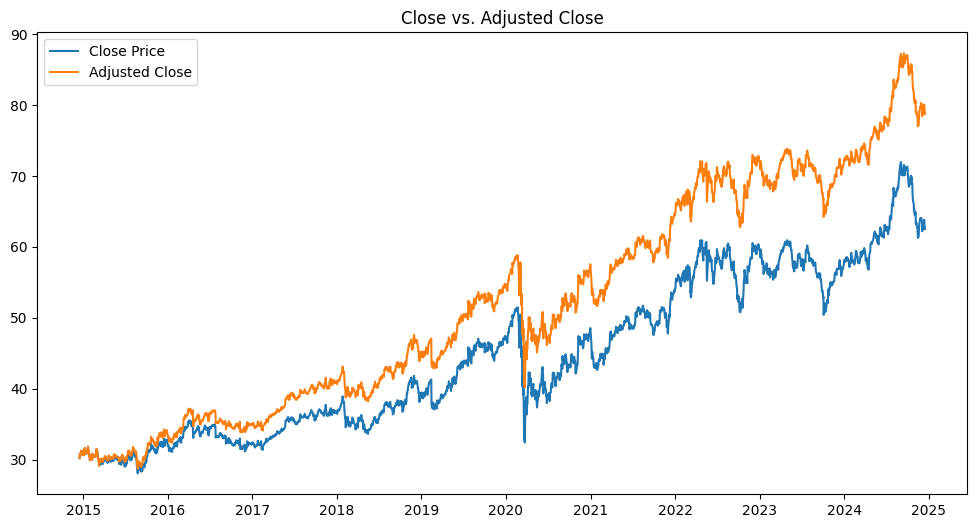

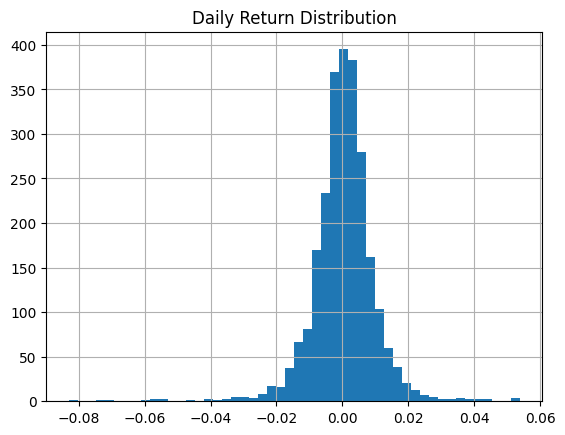

In [ ]:
# Import required libraries
!pip install deap
import yfinance as yf
import pandas as pd
import re
import random
import numpy as np
from deap import base, algorithms, creator, tools, gp
import operator
import math
import matplotlib.pyplot as plt
from functools import partial
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import itertools
import graphviz

# Import 10-year dataframe of Coca-Cola
ticker = "KO"
data = yf.Ticker(ticker).history(period="10y")

# Adjust Daily Returns with Dividends
data['Adjusted Close'] = data['Close'] + data['Dividends'].cumsum()
data['Daily Return'] = data['Adjusted Close'].pct_change()

print((data['Adjusted Close'] - data['Close']).cumsum())
print(data['Dividends'].cumsum())

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label="Close Price")
plt.plot(data['Adjusted Close'], label="Adjusted Close")
plt.legend()
plt.title("Close vs. Adjusted Close")
plt.show()

data['Daily Return'].hist(bins=50)
plt.title("Daily Return Distribution")
plt.show()

# Step 2: Target function Hyperparameter Optimization
This block performs hyperparameter optimization for the moving average strategy used to define the target variable. It explores different combinations of short and long window lengths and thresholds. The ```evaluate_hyperparameters``` function calculates the total return, Sharpe ratio, and maximum drawdown for each combination. The results are stored and analyzed to identify the best-performing set of hyperparameters.

Evaluating: Short Window = 3, Long Window = 30, Threshold = 0.001
Evaluating: Short Window = 3, Long Window = 30, Threshold = 0.002
Evaluating: Short Window = 3, Long Window = 30, Threshold = 0.005
Evaluating: Short Window = 3, Long Window = 30, Threshold = 0.01
Evaluating: Short Window = 3, Long Window = 30, Threshold = 0.02
Evaluating: Short Window = 3, Long Window = 50, Threshold = 0.001
Evaluating: Short Window = 3, Long Window = 50, Threshold = 0.002
Evaluating: Short Window = 3, Long Window = 50, Threshold = 0.005
Evaluating: Short Window = 3, Long Window = 50, Threshold = 0.01
Evaluating: Short Window = 3, Long Window = 50, Threshold = 0.02
Evaluating: Short Window = 3, Long Window = 100, Threshold = 0.001
Evaluating: Short Window = 3, Long Window = 100, Threshold = 0.002
Evaluating: Short Window = 3, Long Window = 100, Threshold = 0.005
Evaluating: Short Window = 3, Long Window = 100, Threshold = 0.01
Evaluating: Short Window = 3, Long Window = 100, Threshold = 0.02
Evaluating:

,Short Window,Long Window,Threshold,Total Return,Sharpe Ratio,Max Drawdown,Normalized Total Return,Score
0,3,30,0.001,1101.278499,0.534053,-0.006787,0.812540,0.456449
1,3,30,0.002,931.786120,0.519286,-0.006787,0.687219,0.433580
2,3,30,0.005,337.254723,0.436659,-0.004519,0.247630,0.331328
3,3,30,0.010,39.446991,0.287568,0.000000,0.027435,0.204041
4,3,30,0.020,3.949908,0.147901,0.000000,0.001189,0.103650
...,...,...,...,...,...,...,...,...
160,50,400,0.001,614.265013,0.563430,0.000000,0.452448,0.439646
161,50,400,0.002,538.988115,0.549674,0.000000,0.396789,0.424451
162,50,400,0.005,239.466171,0.471041,0.000000,0.175326,0.347261
163,50,400,0.010,38.682057,0.323236,0.000000,0.026869,0.228952


Best Parameters: Short Window                 30.000000
Long Window                  50.000000
Threshold                     0.001000
Total Return               1354.812825
Sharpe Ratio                  0.539259
Max Drawdown                 -0.006787
Normalized Total Return       1.000000
Score                         0.478839
Name: 120, dtype: float64
Generating plots for best parameters: Short Window = 30, Long Window = 50, Threshold = 0.001


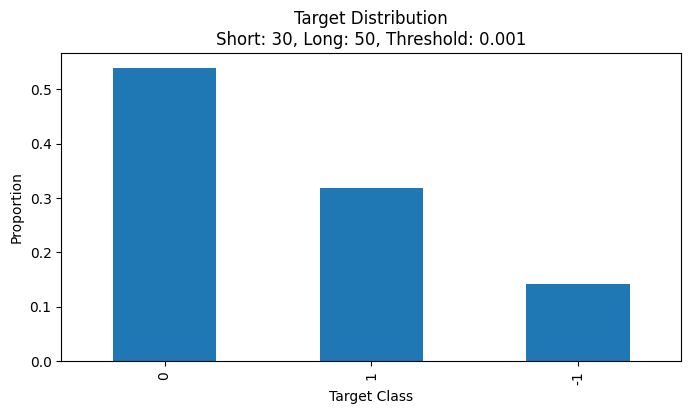

Trades: 1154.0


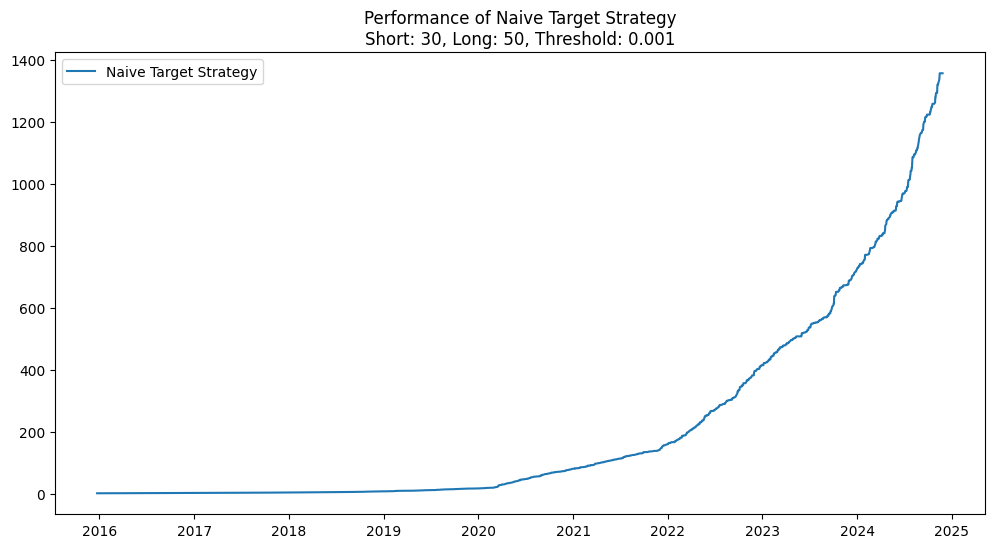

Naive Strategy Total Return: 135481.28%
Naive Strategy Sharpe Ratio: 0.54
Naive Strategy Maximum Drawdown: -0.68%


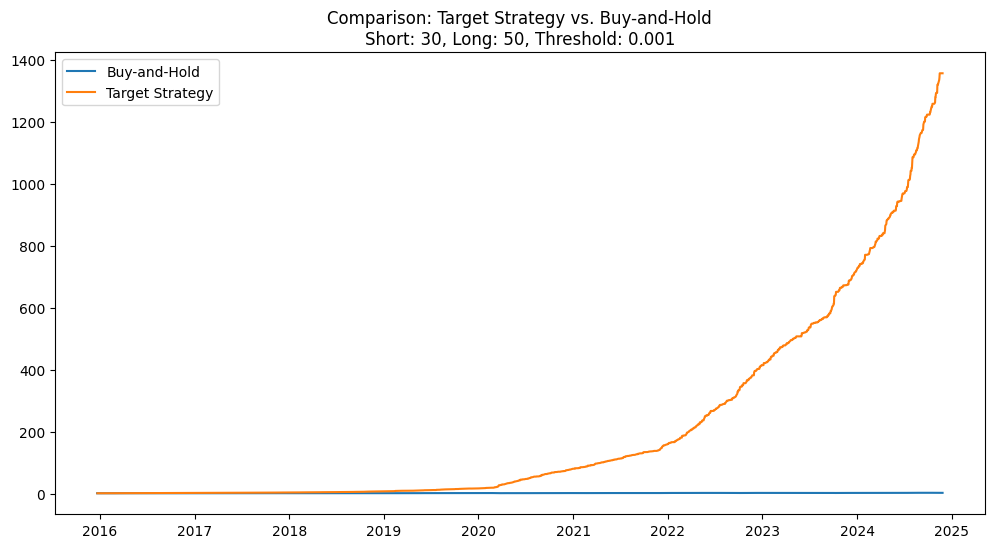

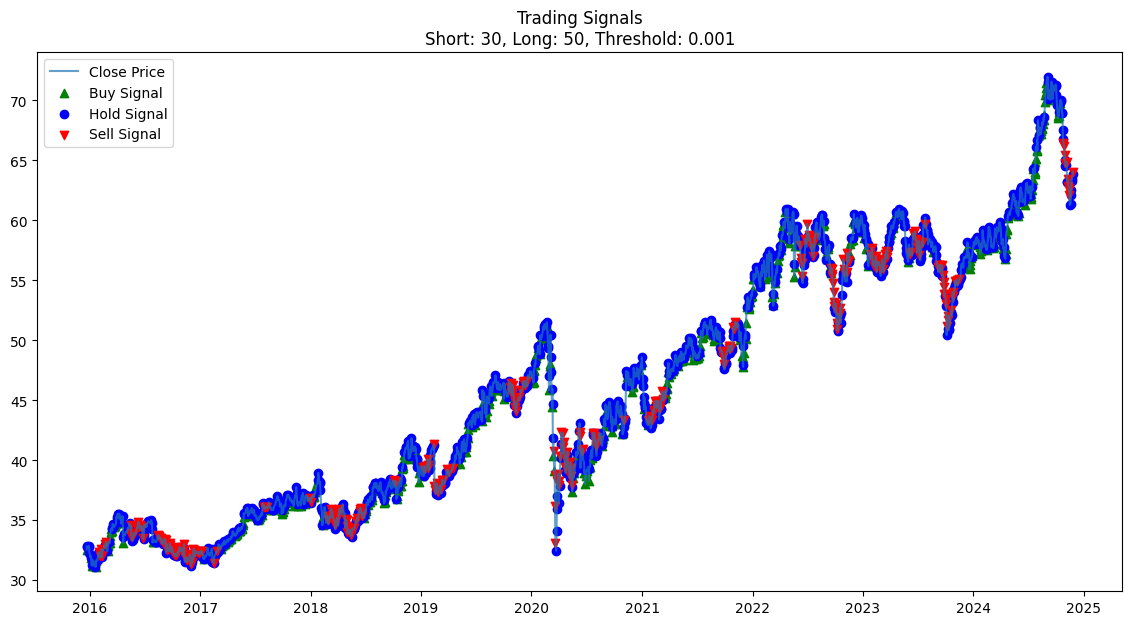

(1354.8128251818325, 0.5392591221376958, -0.006787350046742691)

In [ ]:
# Define ranges for hyperparameters
short_window_range = [3, 5, 10, 20, 30, 50]
long_window_range = [30, 50, 100, 200, 300, 400]
threshold_range = [0.001, 0.002, 0.005, 0.01, 0.02]

# Generate all combinations of parameters
from itertools import product
hyperparameter_grid = list(product(short_window_range, long_window_range, threshold_range))

def evaluate_hyperparameters(short_window, long_window, threshold, data):
    """
    Evaluate hyperparameters without generating plots.
    """
    data['Short_MA'] = data['Close'].rolling(window=short_window).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window).mean()
    data['Trend'] = np.where(data['Short_MA'] > data['Long_MA'], 1, -1)
    data['Price_Change'] = (data['Close'].shift(-1) - data['Close']) / data['Close']
    data['Target'] = np.where(
        (data['Trend'] == 1) & (data['Price_Change'] > threshold), 1,
        np.where((data['Trend'] == -1) & (data['Price_Change'] < -threshold), -1, 0)
    )
    data.dropna(inplace=True)

    data['Naive Return'] = data['Target'].shift(1) * data['Daily Return']
    data['Naive Cumulative Return'] = (1 + data['Naive Return']).cumprod()

    total_return = data['Naive Cumulative Return'].iloc[-1] - 1
    sharpe_ratio = data['Naive Return'].mean() / data['Naive Return'].std()
    max_drawdown = (data['Naive Cumulative Return'] / data['Naive Cumulative Return'].cummax() - 1).min()

    return total_return, sharpe_ratio, max_drawdown

import matplotlib.pyplot as plt

def evaluate_hyperparameters_with_plots(short_window, long_window, threshold, data):
    """
    Evaluate hyperparameters and generate relevant plots.
    """
    # Generate target using these hyperparameters
    data['Short_MA'] = data['Close'].rolling(window=short_window).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window).mean()
    data['Trend'] = np.where(data['Short_MA'] > data['Long_MA'], 1, -1)
    data['Price_Change'] = (data['Close'].shift(-1) - data['Close']) / data['Close']
    data['Target'] = np.where(
        (data['Trend'] == 1) & (data['Price_Change'] > threshold), 1,
        np.where((data['Trend'] == -1) & (data['Price_Change'] < -threshold), -1, 0)
    )
    data.dropna(inplace=True)

    # Plot target distribution
    target_distribution = data['Target'].value_counts(normalize=True)
    plt.figure(figsize=(8, 4))
    target_distribution.plot(kind='bar', title=f"Target Distribution\nShort: {short_window}, Long: {long_window}, Threshold: {threshold}")
    plt.xlabel("Target Class")
    plt.ylabel("Proportion")
    plt.show()

    print("Trades:", data['Target'].diff().fillna(0).abs().sum())

    # Calculate naive strategy metrics
    data['Naive Return'] = data['Target'].shift(1) * data['Daily Return']
    data['Naive Cumulative Return'] = (1 + data['Naive Return']).cumprod()

    # Plot cumulative return of the naive strategy
    plt.figure(figsize=(12, 6))
    plt.plot(data['Naive Cumulative Return'], label="Naive Target Strategy")
    plt.title(f"Performance of Naive Target Strategy\nShort: {short_window}, Long: {long_window}, Threshold: {threshold}")
    plt.legend()
    plt.show()

    # Evaluate key metrics
    naive_total_return = data['Naive Cumulative Return'].iloc[-1] - 1
    naive_sharpe_ratio = data['Naive Return'].mean() / data['Naive Return'].std()
    max_drawdown = (data['Naive Cumulative Return'] / data['Naive Cumulative Return'].cummax() - 1).min()

    print(f"Naive Strategy Total Return: {naive_total_return:.2%}")
    print(f"Naive Strategy Sharpe Ratio: {naive_sharpe_ratio:.2f}")
    print(f"Naive Strategy Maximum Drawdown: {max_drawdown:.2%}")

    # Compare with buy-and-hold strategy
    data['Buy-and-Hold'] = data['Adjusted Close'] / data['Adjusted Close'].iloc[0]
    plt.figure(figsize=(12, 6))
    plt.plot(data['Buy-and-Hold'], label="Buy-and-Hold")
    plt.plot(data['Naive Cumulative Return'], label="Target Strategy")
    plt.legend()
    plt.title(f"Comparison: Target Strategy vs. Buy-and-Hold\nShort: {short_window}, Long: {long_window}, Threshold: {threshold}")
    plt.show()

    # Plot buy and sell signals
    plt.figure(figsize=(14, 7))
    plt.plot(data['Close'], label="Close Price", alpha=0.7)
    buy_signals = data[data['Target'] == 1]
    hold_signals = data[data['Target'] == 0]
    sell_signals = data[data['Target'] == -1]
    plt.scatter(buy_signals.index, buy_signals['Close'], label="Buy Signal", marker="^", color="green", alpha=1)
    plt.scatter(hold_signals.index, hold_signals['Close'], label="Hold Signal", marker="o", color="blue", alpha=1)
    plt.scatter(sell_signals.index, sell_signals['Close'], label="Sell Signal", marker="v", color="red", alpha=1)
    plt.title(f"Trading Signals\nShort: {short_window}, Long: {long_window}, Threshold: {threshold}")
    plt.legend()
    plt.show()

    return naive_total_return, naive_sharpe_ratio, max_drawdown


results = []
for short_window, long_window, threshold in hyperparameter_grid:
    if short_window >= long_window:  # Skip invalid combinations
        continue

    print(f"Evaluating: Short Window = {short_window}, Long Window = {long_window}, Threshold = {threshold}")
    total_return, sharpe_ratio, max_drawdown = evaluate_hyperparameters(
        short_window, long_window, threshold, data.copy()
    )
    results.append({
        "Short Window": short_window,
        "Long Window": long_window,
        "Threshold": threshold,
        "Total Return": total_return,
        "Sharpe Ratio": sharpe_ratio,
        "Max Drawdown": max_drawdown
    })

# Store results in a DataFrame and find the best parameters
results_df = pd.DataFrame(results)

# Calculate min and max for total return
min_return = results_df['Total Return'].min()
max_return = results_df['Total Return'].max()

# Normalize total return to a range of 0 to 1
results_df['Normalized Total Return'] = (results_df['Total Return'] - min_return) / (max_return - min_return)

# Sort by Score to identify the best parameters
results_df['Score'] = (
    0.7 * results_df['Sharpe Ratio'] +  # Weight for Sharpe Ratio
    0.1 * results_df['Normalized Total Return'] -  # Weight for Total Return
    0.2 * results_df['Max Drawdown']   # Penalize large drawdowns
)

from IPython.display import display
display(results_df)

best_parameters = results_df.sort_values(by="Score", ascending=False).iloc[0]
print(f"Best Parameters: {best_parameters}")

# Extract best parameters
best_short_window = int(best_parameters['Short Window'])
best_long_window = int(best_parameters['Long Window'])
best_threshold = float(best_parameters['Threshold'])

# Generate plots for the best hyperparameters
print(f"Generating plots for best parameters: Short Window = {best_short_window}, Long Window = {best_long_window}, Threshold = {best_threshold}")
evaluate_hyperparameters_with_plots(
    best_short_window, best_long_window, best_threshold, data.copy()
)

# Step 3: Register optimal target function
This block registers the optimal target function and drops NaN rows.

In [ ]:
# Parameters for Moving Averages and Threshold
short_window = 30  # Short-term moving average window
long_window = 50   # Long-term moving average window
threshold = 0.001  # 0.1% threshold for significant price change

# Calculate Moving Averages
data['Short_MA'] = data['Close'].rolling(window=short_window).mean()
data['Long_MA'] = data['Close'].rolling(window=long_window).mean()

# Identify Trends Using Moving Averages
data['Trend'] = np.where(data['Short_MA'] > data['Long_MA'], 1, -1)  # 1 for uptrend, -1 for downtrend

# Calculate Percentage Price Change
data['Price_Change'] = (data['Close'].shift(-1) - data['Close']) / data['Close']

# Define Target Using Trend and Threshold
data['Target'] = np.where(
    (data['Trend'] == 1) & (data['Price_Change'] > threshold), 1,   # Buy signal for uptrend and significant price increase
    np.where(
        (data['Trend'] == -1) & (data['Price_Change'] < -threshold), -1,  # Sell signal for downtrend and significant price decrease
        0  # Hold for small changes or conflicting signals
    )
)

# Calculate naive strategy metrics
data['Target Return'] = data['Target'].shift(1) * data['Daily Return']
data['Target Cumulative Return'] = (1 + data['Target Return']).cumprod()

# Drop rows with NaN values (resulting from moving averages)
data.dropna(inplace=True)

# Step 4: Define all indicator functions and operators
This block defines all indicator functions and precomputes their output for specified parameters.
It also defines and registers the mathematical operations

In [ ]:
# Momentum
def momentum(data, period):
    return data['Close'].diff(period)

# Moving Average
def moving_average(data, period):
    return data['Close'].rolling(window=period).mean()

# Volatility (e.g., Standard Deviation)
def volatility(data, period):
    return data['Close'].rolling(window=period).std()

# RSI
def rsi(data, period):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# MACD
def macd(data, short_period, long_period, signal_period):
    short_ma = data['Close'].ewm(span=short_period, adjust=False).mean()
    long_ma = data['Close'].ewm(span=long_period, adjust=False).mean()
    macd_line = short_ma - long_ma
    signal_line = macd_line.ewm(span=signal_period, adjust=False).mean()
    return macd_line, signal_line

# ATR
def atr(data, period):
    high_low = data['High'] - data['Low']
    high_close = np.abs(data['High'] - data['Close'].shift())
    low_close = np.abs(data['Low'] - data['Close'].shift())
    tr = high_low.combine(high_close, max).combine(low_close, max)
    return tr.rolling(window=period).mean()

# Williams %R
def williams(data, period):
    highest_high = data['High'].rolling(window=period).max()
    lowest_low = data['Low'].rolling(window=period).min()
    return -100 * ((highest_high - data['Close']) / (highest_high - lowest_low))

# Bollinger Bands
def bollinger_bands(data, period, std_dev_multiplier):
    ma = data['Close'].rolling(window=period).mean()
    std_dev = data['Close'].rolling(window=period).std()
    upper_band = ma + std_dev_multiplier * std_dev
    lower_band = ma - std_dev_multiplier * std_dev
    return upper_band, lower_band

# ADX
def adx(data, period):
    plus_dm = data['High'].diff().clip(lower=0)
    minus_dm = data['Low'].diff().clip(upper=0).abs()
    tr = atr(data, period)
    plus_di = 100 * (plus_dm.rolling(window=period).sum() / tr)
    minus_di = 100 * (minus_dm.rolling(window=period).sum() / tr)
    dx = (np.abs(plus_di - minus_di) / (plus_di + minus_di)) * 100
    return dx.rolling(window=period).mean()

# CMF
def cmf(data, period):
    money_flow_multiplier = ((data['Close'] - data['Low']) - (data['High'] - data['Close'])) / (data['High'] - data['Low'])
    money_flow_volume = money_flow_multiplier * data['Volume']
    return money_flow_volume.rolling(window=period).sum() / data['Volume'].rolling(window=period).sum()

#Define feature set with parameter ranges
feature_set = {
    'momentum': {'function': momentum, 'params': {'period': [5, 10, 20]}},
    'moving_average': {'function': moving_average, 'params': {'period': [10, 20, 50]}},
    'volatility': {'function': volatility, 'params': {'period': [10, 20, 50]}},
    'rsi': {'function': rsi, 'params': {'period': [14, 20, 30]}},
    'macd': {'function': macd, 'params': {'short_period': [10, 12], 'long_period': [26, 30], 'signal_period': [9, 10]}},
    'atr': {'function': atr, 'params': {'period': [10, 14, 20]}},
    'williams': {'function': williams, 'params': {'period': [10, 14, 20]}},
    'bollinger_bands': {'function': bollinger_bands, 'params': {'period': [20, 30], 'std_dev_multiplier': [2, 2.5, 3]}},
    'adx': {'function': adx, 'params': {'period': [14, 20, 30]}},
    'cmf': {'function': cmf, 'params': {'period': [20, 30, 40]}}
}

def random_params(params):
    return {key: random.choice(values) for key, values in params.items()}

feature_params_mapping = {}

def apply_indicator(indicator, data, params):
    function = feature_set[indicator]['function']
    result = function(data, **params)

    # Store parameters in the mapping
    feature_params_mapping[indicator] = params

    # If the indicator returns multiple outputs, return as a tuple
    if isinstance(result, tuple):
        return result  # Return the tuple directly
    else:
        return (result,)  # Return as a single-element tuple for consistency

# Print function with parameters
def print_function_with_params(individual):
    # Get the function expression
    func_expr = str(individual)

    # Traverse the expression to find features
    for feature_name in feature_set:
        if feature_name in func_expr:
            # Retrieve parameters for the feature
            params = feature_params_mapping.get(feature_name, {})  # Handle missing features gracefully
            print(f"Feature: {feature_name}, Parameters: {params}")

    print(f"Function: {func_expr}")

# Precompute Indicators
precomputed_features = []
feature_name_mapping = {}
for i, indicator in enumerate(feature_set):
    # Generate all parameter combinations
    param_combinations = [dict(zip(feature_set[indicator]['params'], values))
                         for values in itertools.product(*feature_set[indicator]['params'].values())]

    for params in param_combinations:  # Iterate through combinations
        print(f"Processing {indicator} with parameters: {params}")
        feature_data = apply_indicator(indicator, data, params)  # Get feature data

        # Handle multiple outputs (e.g., Bollinger Bands, MACD)
        if isinstance(feature_data, tuple):
            # If the indicator returns a tuple (multiple outputs), add each output as a separate feature
            for j, output in enumerate(feature_data):
                precomputed_features.append(output)  # Append each output
                # Create a unique feature name for each output
                new_feature_name = f"{indicator}_{'_'.join(str(v) for v in params.values())}_{j}"
                feature_name_mapping[f"Feature_{len(precomputed_features) - 1}"] = new_feature_name
        else:
            # If the indicator returns a single output, add it as a feature
            precomputed_features.append(feature_data)
            new_feature_name = f"{indicator}_{'_'.join(str(v) for v in params.values())}"
            feature_name_mapping[f"Feature_{len(precomputed_features) - 1}"] = new_feature_name

print("Precomputed Features Length:", len(precomputed_features))

features = np.column_stack(precomputed_features)  # Combine all features
print(features.shape)
# Create the Primitive Set using the correct number of features (columns in features)
pset = gp.PrimitiveSet("MAIN", features.shape[1])  # Use features.shape[1] for total columns

# Map features to terminals
feature_index = 0  # Keep track of the current feature index in 'features'
feature_names = set()
for i, indicator in enumerate(feature_set):
    # Generate all parameter combinations
    param_combinations = [dict(zip(feature_set[indicator]['params'], values))
                         for values in itertools.product(*feature_set[indicator]['params'].values())]

    for params in param_combinations:  # Iterate through combinations
        # Get feature data and number of outputs for this combination
        feature_data = apply_indicator(indicator, data, params)  # Get feature data
        num_outputs = len(feature_data)  # Number of outputs for this indicator

        # Map to terminals, considering multiple outputs
        for output_index in range(num_outputs):
            new_feature_name = f"F{feature_index}"

            pset.renameArguments(**{f'ARG{feature_index}': new_feature_name})
            print(new_feature_name, indicator, params) # Print the feature name
            feature_index += 1  # Increment feature_index for each output

# Add operators
pset.addPrimitive(operator.add, 2, name="add")
pset.addPrimitive(operator.sub, 2, name="sub")
pset.addPrimitive(operator.mul, 2, name="mul")

# Handle safe division
def safe_div(left, right):
    return left / right if abs(right) > 1e-6 else 1
pset.addPrimitive(safe_div, 2, name="safe_div")

def safe_power(a, b):
    return abs(a) ** b if (b >= 0 and b < 10 and a > -1000 and a < 1000) else a * b
pset.addPrimitive(safe_power, 2, name="safe_power")

def safe_sqrt(a):
    return math.sqrt(a) if a >= 0 else a
pset.addPrimitive(safe_sqrt, 1, name="safe_sqrt")

def safe_exp(x):
    return np.exp(x) if -10 < x < 10 else x  # Avoid overflow
pset.addPrimitive(safe_exp, 1, name="safe_exp")  # Avoid overflow

def safe_log(a):
    return math.log(abs(a)) if abs(a) > 0 else a
pset.addPrimitive(safe_log, 1, name="safe_log")

pset.addPrimitive(math.sin, 1, name="sin")

pset.addPrimitive(math.cos, 1, name="cos")

def mean(a, b):
    return (a + b) / 2
pset.addPrimitive(mean, 2, name="mean")

def stddev(a, b):
    return math.sqrt(((a - b) ** 2) / 2)
pset.addPrimitive(stddev, 2, name="stddev")

def clamp(a, min_val=-1, max_val=1):
    return max(min(a, max_val), min_val)
pset.addPrimitive(clamp, 1, name="clamp")

def compare(a, b, threshold=0.01):  # Example threshold
    diff = a - b
    if diff > threshold:
        return 1
    elif diff < -threshold:
        return -1
    else:
        return 0
pset.addPrimitive(compare, 3, name="compare")

# Add constants
pset.addEphemeralConstant("rand101", partial(np.random.randint, -100, 100))

Processing momentum with parameters: {'period': 5}
Processing momentum with parameters: {'period': 10}
Processing momentum with parameters: {'period': 20}
Processing moving_average with parameters: {'period': 10}
Processing moving_average with parameters: {'period': 20}
Processing moving_average with parameters: {'period': 50}
Processing volatility with parameters: {'period': 10}
Processing volatility with parameters: {'period': 20}
Processing volatility with parameters: {'period': 50}
Processing rsi with parameters: {'period': 14}
Processing rsi with parameters: {'period': 20}
Processing rsi with parameters: {'period': 30}
Processing macd with parameters: {'short_period': 10, 'long_period': 26, 'signal_period': 9}
Processing macd with parameters: {'short_period': 10, 'long_period': 26, 'signal_period': 10}
Processing macd with parameters: {'short_period': 10, 'long_period': 30, 'signal_period': 9}
Processing macd with parameters: {'short_period': 10, 'long_period': 30, 'signal_period'

# Step 5: Define genetic algorithm functions

In [ ]:
if "FitnessMulti" in creator.__dict__:
    del creator.FitnessMulti
if "Individual" in creator.__dict__:
    del creator.Individual

# Weighting of multi-objective optimization
creator.create("FitnessMulti", base.Fitness, weights=(0.75, 2.0, -0.75, -1.0))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMulti)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=4) # Initial population
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)

toolbox.register("compile", gp.compile, pset=pset)

# Genetic Operators
def mutate_period(tree, precomputed_features, feature_name_mapping):
    """
    Replaces an existing terminal with a new precomputed feature of the same indicator
    but with different parameters. Adapted for terminals named F0-F89.
    """

    # Select a random terminal node with parameters
    terminals = [node for node in tree if isinstance(node, gp.Terminal) and str(node.value).startswith("F")]
    if not terminals:
        return tree  # No terminals with parameters to optimize

    terminal = random.choice(terminals)

    # Get the feature index from the terminal name (e.g., F0 -> 0)
    feature_index = int(str(terminal.value)[1:])

    # Get the original feature name from the mapping
    original_feature_name = feature_name_mapping[f"Feature_{feature_index}"]

    # Extract the indicator name from the original feature name
    indicator = original_feature_name.split("_")[0]

    # Get all precomputed features for this indicator
    available_features = [feature for feature in feature_name_mapping.values() if feature.startswith(indicator + "_")]

    # Choose a random feature (different from the current one)
    new_feature = random.choice([feature for feature in available_features if feature != original_feature_name])

    # Get the new feature index from feature_name_mapping
    new_feature_index = list(feature_name_mapping.keys())[list(feature_name_mapping.values()).index(new_feature)]
    new_feature_index = int(new_feature_index.split("_")[1])

    # Replace the terminal in the tree
    terminal.value = f"F{new_feature_index}"

    return tree

def mutate_indicator(tree, precomputed_features, feature_name_mapping):
    """
    Replaces an existing terminal with a new precomputed feature of a different indicator
    with random parameters. Adapted for terminals named F0-F89.
    """

    # Select a random terminal node with parameters
    terminals = [node for node in tree if isinstance(node, gp.Terminal) and str(node.value).startswith("F")]
    if not terminals:
        return tree  # No terminals with parameters to optimize

    terminal = random.choice(terminals)

    # Get the feature index from the terminal name (e.g., F0 -> 0)
    feature_index = int(str(terminal.value)[1:])

    # Get the original feature name from the mapping
    original_feature_name = feature_name_mapping[f"Feature_{feature_index}"]

    # Extract the current indicator name from the original feature name
    current_indicator = original_feature_name.split("_")[0]

    # Choose a new indicator (different from the current one)
    available_indicators = list(precomputed_features.keys())
    new_indicator = random.choice([ind for ind in available_indicators if ind != current_indicator])

    # Get all precomputed features for the new indicator
    available_features = [feature for feature in feature_name_mapping.values() if feature.startswith(new_indicator + "_")]

    # Choose a random feature for the new indicator
    new_feature = random.choice(available_features)

    # Get the new feature index from feature_name_mapping
    new_feature_index = list(feature_name_mapping.keys())[list(feature_name_mapping.values()).index(new_feature)]
    new_feature_index = int(new_feature_index.split("_")[1])

    # Replace the terminal in the tree
    terminal.value = f"F{new_feature_index}"

    return tree

# Register mutation functions
toolbox.register("mutate_period", mutate_period, precomputed_features=feature_set, feature_name_mapping=feature_name_mapping)
toolbox.register("mutate_indicator", mutate_indicator, precomputed_features=feature_set, feature_name_mapping=feature_name_mapping)

def period_based_hill_climbing(tree_str, precomputed_features, feature_name_mapping, max_iterations=10, verbose=False):
    """
    Period-Based Hill Climbing: Adjusts the periods of indicators in the GP tree
    to improve fitness using precomputed features. Works with string representations.
    """

    # Cache for storing fitness values
    fitness_cache = {}

    step_size = 1  # Initial step size for parameter adjustments

    best_tree_str = tree_str
    best_tree = gp.PrimitiveTree.from_string(best_tree_str, pset)  # Create tree for evaluation
    # Initialize fitness attribute:
    best_tree.fitness = creator.FitnessMulti()
    best_tree.fitness.values = toolbox.evaluate(best_tree)
    best_fitness = best_tree.fitness.values[1]

    if(verbose):
      print(f"Before hill climbing: {tree_str}")
      print(f"Current fitness: {best_fitness}")

    for _ in range(max_iterations):
        # Find terminals in the string representation
        terminals = [match.group(0) for match in re.finditer(r"F\d+", best_tree_str)]
        if not terminals:
            break  # No terminals with parameters to optimize

        terminal = random.choice(terminals)  # Select a random terminal

        # Get the original feature name from the mapping
        original_feature_name = feature_name_mapping[f"Feature_{int(terminal[1:])}"]

        # Extract the indicator name from the original feature name
        indicator = original_feature_name.split("_")[0]

        # Get all precomputed features for this indicator
        available_features = [feature for feature in feature_name_mapping.values() if feature.startswith(indicator + "_")]
        available_features = [feature for feature in available_features if feature != original_feature_name]  # Exclude current feature

        # Try new features and evaluate fitness
        for new_feature in available_features:
            # Find the new terminal name corresponding to new_feature
            new_terminal = "F" + list(feature_name_mapping.keys())[list(feature_name_mapping.values()).index(new_feature)].split("_")[1]

            # Create a new tree string with the replacement
            new_tree_str = best_tree_str.replace(terminal, new_terminal, 1)  # Replace only the first occurrence

            # Added validation: Check if new_terminal is valid
            try:
                # Attempt to create a tree to validate the terminal
                gp.PrimitiveTree.from_string(new_tree_str, pset)
            except TypeError as e:
                # If TypeError (likely due to invalid terminal), skip this iteration
                continue # Continue to the next iteration of the inner loop

            if new_tree_str in fitness_cache:
                new_fitness = fitness_cache[new_tree_str]
            else:
                new_tree = gp.PrimitiveTree.from_string(new_tree_str, pset)
                new_tree.fitness = creator.FitnessMulti()
                new_tree.fitness.values = toolbox.evaluate(new_tree)
                new_fitness = new_tree.fitness.values[1]
                fitness_cache[new_tree_str] = new_fitness

            if new_fitness > best_fitness:  # If fitness is improved
                if(verbose):
                    print(f"Period-Based Hill Climbing: Replacing {original_feature_name} ({terminal}) with {new_feature} ({new_terminal}) in {new_tree_str} for improvement: {new_fitness - best_fitness}")
                best_tree_str, best_fitness = new_tree_str, new_fitness
                step_size = min(step_size + 1, 5)  # Increase step size if improvement is found
            else:
                step_size = max(step_size - 1, 1)  # Decrease step size if no improvement
    if(verbose):
      print(f"Best fitness: {best_fitness}")
      print(f"Best tree string: {best_tree_str}")
    return best_tree_str  # Return the best tree string

toolbox.register("mutate_period_based_hill_climbing", period_based_hill_climbing, precomputed_features=feature_set, feature_name_mapping=feature_name_mapping)

# Step 6: Define Fitness Function
It is important here to prevent look ahead bias and do computations of the fitness function values right.

In [ ]:
#Initialize columns
data['Prediction'] = data['Open']
data['Strategy Return'] = data['Open']
data['Cumulative Return'] = data['Open']
data['Drawdown'] = data['Open']
data['Rolling Max'] = data['Open']

trades = []

# Helper functions for vectorized evaluation
def calculate_sharpe(strategy_return, risk_free_rate=0.01):
    """
    Calculate the Sharpe ratio for a given strategy return.

    Parameters:
    - strategy_return: Pandas Series or array of strategy returns.
    - risk_free_rate: Risk-free rate used in Sharpe ratio calculation.

    Returns:
    - Sharpe Ratio: Float representing the risk-adjusted return.
    """
    # Calculate average return and standard deviation of returns
    avg_return = strategy_return.mean() #- risk_free_rate #excluding risk free rate because sharpe is just used for comparison of individuals (later on included)
    std_dev = strategy_return.std()

    # Avoid divide-by-zero errors
    if std_dev == 0:
        return 0

    # Calculate Sharpe Ratio
    sharpe_ratio = avg_return / std_dev
    return sharpe_ratio

def calculate_max_drawdown(data, predictions):
    data.loc[:, 'Strategy Return'] = predictions * data['Close'].pct_change()
    data.loc[:, 'Cumulative Return'] = (1 + data['Strategy Return']).cumprod()
    data.loc[:, 'Rolling Max'] = data['Cumulative Return'].cummax()
    data.loc[:, 'Drawdown'] = data['Cumulative Return'] / data['Rolling Max'] - 1
    return data['Drawdown'].min()

def calculate_accuracy(data_split, predictions):
    return sum(predictions == data_split['Target']) / len(data_split['Target'])

def calculate_rate_of_missing_chances(data_split, predictions):
    # Ensure predictions and data_split['Target'] are NumPy arrays for element-wise comparison
    predictions = np.array(predictions)
    target_values = np.array(data_split['Target'])

    # Perform element-wise comparison and sum the True values
    missed_chances = np.sum((predictions != 1) & (target_values == 1))

    return missed_chances / len(data_split['Target'])

def calculate_rate_of_failure(data_split, predictions):
    # Ensure predictions and data_split['Target'] are NumPy arrays for element-wise comparison
    predictions = np.array(predictions)
    target_values = np.array(data_split['Target'])

    # Perform element-wise comparison and sum the True values
    failure_count = np.sum((predictions == 1) & (target_values != 1))

    return failure_count / len(data_split['Target'])

def calculate_individual_complexity(individual):
    return math.log(len(individual)) + individual.height

# Vectorized Fitness Function with Expanding Window, Hold Option, Transaction Costs, and Trade Penalty
def fitness_function(individual, transaction_cost=0.001, min_trades=5, max_trades=1500):
    """
    Fitness function using expanding window for evaluation.
    Includes:
    - Hold signals to reduce excessive trading.
    - Transaction costs for each trade.
    - Penalty for strategies that never or rarely trade.
    Evaluates individuals based on:
    - Accuracy
    - Sharpe Ratio (risk-adjusted returns)
    - Maximum Drawdown (penalizing large losses)
    - Model complexity (penalizing overly complex trees)
    """
    func = toolbox.compile(expr=individual)
    all_strategy_returns = []  # To collect returns across all windows
    all_trades = []  # To collect trades count
    train_accuracies = []
    train_rmcs = []
    train_rfs = []
    test_accuracies = []
    test_rmcs = []
    test_rfs = []

    # Expanding window loop
    split_point = int(len(data) * 0.2)  # Start testing after 20% of the dataset
    for test_start in range(split_point, len(data) - int(len(data) * 0.1), int(len(data) * 0.1)):
        train_data = data.iloc[:test_start].dropna()  # Expanding training set
        test_end = test_start + int(len(data) * 0.1)  # Size of the test set
        test_data = data.iloc[test_start:test_end].dropna()

        def evaluate(data_split):
            """
            Apply the GP function on the dataset with hold and transaction costs.
            """
            # Use the integer location of each index value within the original data
            # index_values = data_split.index.get_indexer(data.index)  # Original line - commented out
            # Instead of the above approach, reset the index to avoid misalignment
            data_split = data_split.reset_index(drop=True) # Reset the index

            # Use integer indexing to access feature values
            feature_values = features[data_split.index]  # Simplified

            predictions = []
            for row in feature_values:
                prediction = func(*row)
                # Ensure prediction is a scalar
                prediction = float(prediction)  # Convert to scalar if necessary
                threshold_buy, threshold_sell = 0.01, -0.01
                if prediction > threshold_buy:
                    predictions.append(1)  # Buy
                elif prediction < threshold_sell:
                    predictions.append(-1)  # Sell
                else:
                    predictions.append(0)  # Hold
            return predictions

        # Evaluate on training and testing datasets
        train_predictions = evaluate(train_data)
        individual.preds = train_predictions
        test_predictions = evaluate(test_data)

        def calculate_strategy_return_with_costs(data_split, predictions):
            """
            Calculate strategy returns without transaction costs. Strategies get invalidated if their trade count is not sufficient
            """
            data_split = data_split.copy()  # Ensure a new copy is created

            # Ensure 'Prediction' column exists
            if 'Prediction' not in data_split.columns:
                data_split['Prediction'] = 0  # or any default value

            # Assign predictions to the correct slice of the DataFrame
            data_split.loc[data_split.index, 'Prediction'] = predictions
            data_split.loc[:, 'Prediction'].shift(1)  # Shift to prevent lookahead bias
            data_split.loc[:, 'Prediction'].fillna(0)  # Fill NaN (introduced by shift) with 0

            data_split.loc[:, 'Strategy Return'] = data_split['Prediction'] * data_split['Close'].pct_change()

            # Identify trades (changes in position)
            data_split.loc[:, 'Trades'] = data_split['Prediction'].diff().fillna(0).abs()

            return data_split['Strategy Return'], data_split['Trades'].sum()

        # Compute metrics for training data
        train_strategy_return, train_trades = calculate_strategy_return_with_costs(train_data, train_predictions)
        train_data.loc[:, 'Strategy Return'] = train_strategy_return
        train_accuracy = calculate_accuracy(train_data, train_predictions)
        train_rmc = calculate_rate_of_missing_chances(train_data, train_predictions)
        train_rf = calculate_rate_of_failure(train_data, train_predictions)

        # Compute metrics for testing data
        test_strategy_return, test_trades = calculate_strategy_return_with_costs(test_data, test_predictions)
        test_data.loc[:, 'Strategy Return'] = test_strategy_return
        test_accuracy = calculate_accuracy(test_data, test_predictions)
        test_rmc = calculate_rate_of_missing_chances(test_data, test_predictions)
        test_rf = calculate_rate_of_failure(test_data, test_predictions)

        # Append metrics
        train_accuracies.append(train_accuracy)
        train_rmcs.append(train_rmc)
        train_rfs.append(train_rf)
        test_accuracies.append(test_accuracy)
        test_rmcs.append(test_rmc)
        test_rfs.append(test_rf)

        # Append returns for global evaluation
        all_strategy_returns.append(train_strategy_return)
        all_strategy_returns.append(test_strategy_return)
        all_trades.extend([train_trades, test_trades])


    # Aggregate and normalize metrics
    avg_train_accuracy = np.nanmean(train_accuracies)
    avg_train_rmc = np.nanmean(train_rmcs)
    avg_train_rf = np.nanmean(train_rfs)
    avg_test_accuracy = np.nanmean(test_accuracies)
    avg_test_rmc = np.nanmean(test_rmcs)
    avg_test_rf = np.nanmean(test_rfs)

    # Combine all returns
    combined_returns = pd.concat(all_strategy_returns, ignore_index=True)

    avg_return = combined_returns.mean() - 0.01

    std_dev = combined_returns.std()

    # Calculate Sharpe Ratio and Max Drawdown for all returns
    overall_sharpe = calculate_sharpe(combined_returns)

    cumulative_return = (1 + combined_returns).cumprod()
    rolling_max = cumulative_return.cummax()
    overall_drawdown = (cumulative_return / rolling_max - 1).min()
    total_trades = sum(all_trades)

    drawdown_penalty = abs(overall_drawdown)

    # Penalize tree complexity
    complexity_penalty = calculate_individual_complexity(individual)

    # Log intermediate metrics
    individual.train_accuracy = avg_train_accuracy
    individual.sharpe = overall_sharpe
    individual.drawdown = drawdown_penalty
    individual.complexity = complexity_penalty
    individual.train_rmc = avg_train_rmc
    individual.train_rf = avg_train_rf
    individual.test_accuracy = avg_test_accuracy
    individual.test_rmc = avg_test_rmc
    individual.test_rf = avg_test_rf

    if total_trades < min_trades or total_trades > max_trades:
      return -1, -100, 2, 100 # Penalize for insufficient trades (-1 for accuracy is always dominated)


    return avg_test_accuracy, overall_sharpe, drawdown_penalty, complexity_penalty

target = data['Target'].values

#toolbox.unregister("evaluate") # Uncomment if block is rerun
toolbox.register("evaluate", fitness_function)

#toolbox.unregister("select") # Uncomment if block is rerun
toolbox.register("select", tools.selSPEA2)

# Step 7: Initialize the population and define logbook
This block initializes the population with custom individuals and generates random individuals with the ```genHalfAndHalf``` method. Afterwards hill climbing is applied to the individuals to improve initial performance.
Also several metrics get registered in the logbook.

In [ ]:
# Append custom individuals
# Define custom strategies as strings
custom_strategies = [
    "sub(F0, F2)",  # difference between short-term and long-term momentum
    "sub(F3, F5)",  # difference between short-term and long-term moving averages
    "sub(F10, F2)",  # divergence between RSI and momentum for overbought/oversold detection
    "mul(F31, F1)",  # Combines stochastic oscillator (Williams %R) with momentum
    "safe_div(F10, F7)",  # volatility to normalize RSI
    "sub(F49, F2)",  # Combines volume and momentum for identifying divergence
    "add(sub(F3, F5), mul(F10, F2))",  # Combines trend-following (MA) with momentum (RSI)
    "mul(F48, sub(F3, F5))",  # Weighs trend strength (ADX) against moving average crossover
    "compare(F2, F10, safe_exp(-0.5))", # Generates buy or sell signals when the momentum surpasses or falls below a relative RSI level
    "compare(F4, add(F30, F47), 0.75)", # identify breakout points where moving averages exceed volatility-adjusted levels
    "sub(mean(F4, F7), F30)", # Detects price levels where average trends and momentum diverge from volatility
    "compare(F6, safe_exp(add(F0, F9)), -0.3)", # Detects volatile periods where short-term momentum and RSI exceed expected ranges
    "compare(mean(F46, F32), F0, safe_exp(-0.25))", # Measures trend strength and reversal signals relative to short-term momentum
    "compare(F5, add(F47, F7), safe_exp(-0.3))", # Identifies long-term trend shifts when moving averages cross adjusted RSI levels
    "compare(F7, mean(F4, F10), safe_exp(-0.1))", # Captures divergences between volatility and combined momentum/trend indicators
    "add(compare(F3, F5, 0.01), compare(F3, F34, -0.01))", # Moving average crossover alone and with bollinger low
    "add(compare(F3, F35, 0.01), compare(F3, F5, 0.01))", # Moving average crossover alone and with bollinger high
    "add(compare(F3, F40, -0.01), compare(F3, F41, 0.01))", # Moving average crossover with upper and lower BB
    "add(compare(F12, F13, 0.01), compare(F3, F36, -0.01))", # MACD signal and lower BB crossover
    "add(compare(F26, F27, 0.01), compare(F3, F45, 0.01))", # MACD signal and upper BB crossover
    "add(compare(F20, F21, 0.01), add(compare(F3, F42, -0.01), compare(F3, F43, 0.01)))", # MACD signal and both BB crossover
    "add(compare(F22, F23, 0.01), sub(F10, F2))", # MACD signal and RSI
    "add(compare(F12, F13, 0.01), compare(F0, F4, 0.01))", # MACD signal and MO MA crossover
    "add(compare(F24, F25, 0.01), mul(F31, F1))", # MACD signal and williams
    "add(compare(F16, F17, 0.01), mean(F48, F32))", # MACD signal and mean of ADX and Williams
]

# Convert to gp.PrimitiveTree objects
custom_individuals = [
    gp.PrimitiveTree.from_string(strategy, pset) for strategy in custom_strategies
]
for ind in custom_individuals:
    ind.fitness = creator.FitnessMulti() # Initialize the fitness attribute

def population_with_custom_and_hill_climbing(n, custom_individuals, toolbox):
    """Generates a population with custom individuals and hill climbing."""
    population = []
    count = 0
    for _ in range(n):
        print(f"Hill climbing on the {count} individual:")
        individual = toolbox.individual()
        str_individual = toolbox.mutate_period_based_hill_climbing(str(individual), verbose=True)  # Apply hill climbing
        individual = gp.PrimitiveTree.from_string(str_individual, pset)
        individual.fitness = creator.FitnessMulti() # Initialize the fitness attribute
        individual.fitness.values = toolbox.evaluate(individual)
        population.append(individual)
        count += 1

    # Evaluate custom individuals
    for ind in custom_individuals:
        ind.fitness.values = toolbox.evaluate(ind)

    population.extend(custom_individuals)
    return population

# Update toolbox registration
toolbox.register("population", population_with_custom_and_hill_climbing, n=200, custom_individuals=custom_individuals, toolbox=toolbox)

population = toolbox.population()

initial_structures = [str(ind) for ind in population]

def population_diversity(population):
    """
    Calculate population diversity based on tree height.
    """
    structures = [str(ind) for ind in population]
    heights = []
    node_counts = []
    for ind in population:
        if isinstance(ind, gp.PrimitiveTree):  # Check if it's a tree
            heights.append(ind.height)
            node_counts.append(len(ind))
        else:  # If not, it's likely a single node
            heights.append(1)
            node_counts.append(1)
    unique_structures = len(set(structures)) / len(population)
    unique_heights = len(set(heights)) / len(population)
    unique_nodes = len(set(node_counts)) / len(population)

    return (unique_structures + unique_heights + unique_nodes) / 3

acc_stats = tools.Statistics(lambda ind: ind.fitness.values[0] if ind.fitness.values[0] > -1 else np.nan)
acc_stats.register("avg_accuracy", np.nanmean)
acc_stats.register("max_accuracy", np.nanmax)
sharpe_stats = tools.Statistics(lambda ind: ind.fitness.values[1] if ind.fitness.values[0] > -1 else np.nan)
sharpe_stats.register("max_sharpe", np.nanmax)
sharpe_stats.register("avg_sharpe", np.nanmean)
drawdown_stats = tools.Statistics(lambda ind: ind.fitness.values[2] if ind.fitness.values[0] > -1 else np.nan)
drawdown_stats.register("avg_drawdown", np.nanmean)
drawdown_stats.register("max_drawdown", np.nanmax)
drawdown_stats.register("min_drawdown", np.nanmin)
complexity_stats = tools.Statistics(lambda ind: ind.fitness.values[3] if ind.fitness.values[0] > -1 else np.nan)
complexity_stats.register("avg_complexity", np.nanmean)
complexity_stats.register("max_complexity", np.nanmax)
complexity_stats.register("min_complexity", np.nanmin)
rmc_stats = tools.Statistics(lambda ind: ind.test_rmc)
rmc_stats.register("avg_test_rmc", np.nanmean)
rmc_stats.register("max_test_rmc", np.nanmax)
rmc_stats.register("min_test_rmc", np.nanmin)
rf_stats = tools.Statistics(lambda ind: ind.test_rf)
rf_stats.register("avg_test_rf", np.nanmean)
rf_stats.register("max_test_rf", np.nanmax)
rf_stats.register("min_test_rf", np.nanmin)
train_acc_stats = tools.Statistics(lambda ind: ind.train_accuracy)
train_acc_stats.register("avg_train_accuracy", np.nanmean)
train_acc_stats.register("max_train_accuracy", np.nanmax)

# Remove 'gen' and 'nevals' from the header if they exist:
header = list(rf_stats.fields)
if "gen" in header:
    header.remove("gen")
if "nevals" in header:
    header.remove("nevals")

# Set the header for the combined statistics
rf_stats.header = tuple(header)  # Reassign the modified list

stats = tools.MultiStatistics(accuracy=acc_stats, sharpe=sharpe_stats, drawdown=drawdown_stats, complexity=complexity_stats, rmc=rmc_stats, rf=rf_stats, a_train=train_acc_stats)

# Add custom tracking for diversity
diversity_stats = tools.Statistics(population_diversity)
diversity_stats.register("diversity", population_diversity)
diversity_stats.header = diversity_stats.fields  # Change header

# Create a MultiStatistics object
combined_stats = tools.MultiStatistics(fitness=stats, diversity=diversity_stats)
# Remove 'gen' and 'nevals' from the header if they exist:
header = list(combined_stats.fields)
if "gen" in header:
    header.remove("gen")
if "nevals" in header:
    header.remove("nevals")

# Set the header for the combined statistics
combined_stats.header = tuple(header)  # Reassign the modified list

logbook = tools.Logbook()  # Create a logbook to store statistics
logbook.header = combined_stats.fields  # Set the header for the logbook

Hill climbing on the 0 individual:
Before hill climbing: mul(F37, F33)
Current fitness: -0.033876061679729653
Period-Based Hill Climbing: Replacing bollinger_bands_20_2.5_1 (F37) with bollinger_bands_30_2_0 (F40) in mul(F40, F33) for improvement: 0.0006378547172595367
Period-Based Hill Climbing: Replacing williams_20_0 (F33) with williams_10_0 (F31) in mul(F40, F31) for improvement: 0.001734473308645637
Best fitness: -0.03150373365382448
Best tree string: mul(F40, F31)
Hill climbing on the 1 individual:
Before hill climbing: compare(safe_div(mul(F40, F30), sub(F14, F18)), sin(mean(F27, F39)), mul(safe_power(F21, F38), cos(F10)))
Current fitness: -0.0028510723391626785
Period-Based Hill Climbing: Replacing macd_10_30_10_0 (F18) with macd_12_30_9_0 (F24) in compare(safe_div(mul(F40, F30), sub(F14, F24)), sin(mean(F27, F39)), mul(safe_power(F21, F38), cos(F10))) for improvement: 0.07147511299461459
Best fitness: 0.06862404065545191
Best tree string: compare(safe_div(mul(F40, F30), sub(F14

# Step 8: Define and run the RL Agent

Generation 0: State: [0.024842   0.10252731 0.92       0.        ]
Next population size: 160
Action: 6, Probabilities: imutpb=0.2, pmutpb=0.2, cmutpb=0.2, hcpb=0.39999999999999997, nopb=0.28
Best individual: compare(F46, F23, F23), Fitness: (0.39075203252032525, 0.1025273076801078, 0.3771100202301724, 2.386294361119891)
Generation 0: {'accuracy': {'avg_accuracy': 0.3479974900420146, 'max_accuracy': 0.5376016260162602}, 'sharpe': {'max_sharpe': 0.1025273076801078, 'avg_sharpe': 0.028842732169692097}, 'drawdown': {'avg_drawdown': 0.4067823109028869, 'max_drawdown': 0.9999921286653325, 'min_drawdown': 0.02578455350886455}, 'complexity': {'avg_complexity': 3.266428104945533, 'max_complexity': 7.367295829986475, 'min_complexity': 1.6931471805599454}, 'rmc': {'avg_test_rmc': 0.0970433180894309, 'max_test_rmc': 0.3328252032520325, 'min_test_rmc': 0.0}, 'rf': {'avg_test_rf': 0.45875571646341456, 'max_test_rf': 0.6671747967479675, 'min_test_rf': 0.0}, 'a_train': {'avg_train_accuracy': 0.3013983

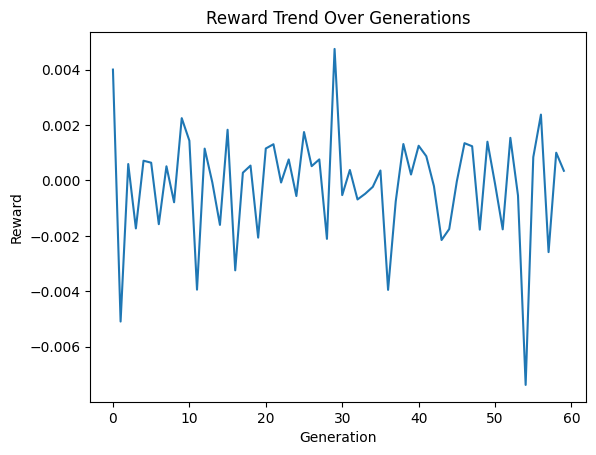

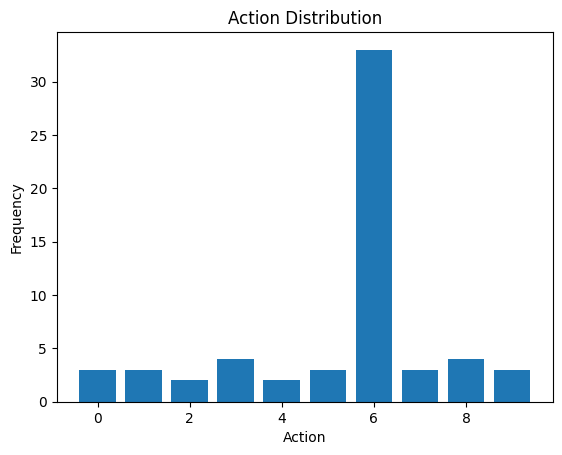

In [ ]:
import random  # For action selection
import numpy as np  # For Q-value updates

# RL Environment (Conceptual)
class GPHH_Environment:
    def __init__(self, toolbox, population):
        self.toolbox = toolbox
        self.population = population
        self.imutpb = 0.2 # Probability of indicator mutation
        self.pmutpb = 0.2  # Probability of period mutation
        self.cmutpb = 0.2   # Probability of constant mutation
        self.hcpb = 0.36   # Probability of hill climbing
        self.nopb = 0.28    # Probability of doing nothing
        self.generations = 0

    def get_state(self):
        # Example state features: sharpe fitness average, diversity, generation count
        fitness_values = [ind.fitness.values[1] if (len(ind.fitness.values) > 1 and ind.fitness.values[1] > -100) else np.nan for ind in self.population] # Check if the tuple has at least 2 elements
        avg_fitness = np.nanmean(fitness_values)
        max_fitness = np.nanmax(fitness_values)
        diversity = len(set(str(ind) for ind in self.population)) / len(self.population)
        state = np.array([avg_fitness, max_fitness, diversity, self.generations])
        return state

    def step(self, action):
        # Apply action (adjust probabilities)
        if action == 0:  # Increase imutpb
            self.imutpb = min(self.imutpb + 0.04, 1.0)
        elif action == 1:  # Decrease imutpb
            self.imutpb = max(self.imutpb - 0.04, 0.0)
        elif action == 2:  # Increase pmutpb
            self.pmutpb = min(self.pmutpb + 0.04, 1.0)
        elif action == 3:  # Decrease pmutpb
            self.pmutpb = max(self.pmutpb - 0.04, 0.0)
        elif action == 4: # Increase cmutpb
            self.cmutpb = min(self.cmutpb + 0.04, 1.0)
        elif action == 5: # Decrease cmutpb
            self.cmutpb = max(self.cmutpb - 0.04, 0.0)
        elif action == 6: # Increase hcpb
            self.hcpb = min(self.hcpb + 0.04, 1.0)
        elif action == 7: # Decrease hcpb
            self.hcpb = max(self.hcpb - 0.04, 0.0)
        elif action == 8: # Increase nopb
            self.nopb = min(self.nopb + 0.04, 1.0)
        elif action == 9: # Decrease nopb
            self.nopb = max(self.nopb - 0.04, 0.0)

        # Perform a GP generation with potential fixes
        # Select, but don't apply clone immediately
        selected_offspring = self.toolbox.select(self.population, max(min(160, len(self.population) - 3), 70))
        # Ensure offspring are all PrimitiveTree objects
        offspring = [self.toolbox.clone(ind) for ind in selected_offspring]
        # Apply variation operators with updated probabilities
        total_prob = self.imutpb + self.pmutpb + self.cmutpb + self.hcpb + self.nopb  # Calculate total probability

        offspring_structures_before = [str(ind) for ind in selected_offspring]
        offspring_after = []

        for mutant in offspring:
            rand_val = random.uniform(0, total_prob)  # Generate random value within the total probability range
            if rand_val < self.imutpb:
                new_mutant = self.toolbox.mutate_indicator(mutant)
                del new_mutant.fitness.values
                offspring_after.append(new_mutant)
                offspring_after.append(mutant)
            elif rand_val < self.imutpb + self.pmutpb:
                new_mutant = self.toolbox.mutate_period(mutant)
                del new_mutant.fitness.values
                offspring_after.append(new_mutant)
                offspring_after.append(mutant)
            elif rand_val < self.imutpb + self.pmutpb + self.cmutpb:
                new_mutant = self.toolbox.clone(mutant)
                del new_mutant.fitness.values # Constants are ephemeral thus invalidating their fitness results in a change of their value
                offspring_after.append(new_mutant)
            elif rand_val < self.imutpb + self.pmutpb + self.cmutpb + self.hcpb:
                str_mutant = self.toolbox.mutate_period_based_hill_climbing(str(mutant))
                new_mutant = gp.PrimitiveTree.from_string(str_mutant, pset)
                new_mutant.fitness = creator.FitnessMulti()
                del new_mutant.fitness.values
                offspring_after.append(new_mutant)
            else:
                offspring_after.append(mutant)

        offspring_structures_after = [str(ind) for ind in offspring_after]

        # Evaluate invalid individuals
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = self.toolbox.map(self.toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Calculate reward (e.g., improvement in max fitness)
        old_fitness_values = [ind.fitness.values[1] if ind.fitness.values[1] > -100 else np.nan for ind in self.population]
        new_fitness_values = [ind.fitness.values[1] if ind.fitness.values[1] > -100 else np.nan for ind in offspring]
        old_max_fitness = np.nanmax(old_fitness_values)
        new_max_fitness = np.nanmax(new_fitness_values)
        old_avg_fitness = np.nanmean(old_fitness_values)
        new_avg_fitness = np.nanmean(new_fitness_values)
        reward = new_avg_fitness - old_avg_fitness

        # Update population
        self.population[:] = offspring
        self.generations += 1

        print("Next population size:", len(self.population))

        print(f"Action: {action}, Probabilities: imutpb={self.imutpb}, pmutpb={self.pmutpb}, cmutpb={self.cmutpb}, hcpb={self.hcpb}, nopb={self.nopb}")

        # Get next state
        next_state = self.get_state()
        done = self.generations >= ngen  # Stop after max generations
        return next_state, reward, done

# RL Agent (Q-learning example)
class QLearningAgent:
    def __init__(self, actions, learning_rate=0.1, discount_factor=0.9, epsilon=1.12):
        self.actions = actions
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.q_table = {}  # Key: state-action pairs, Value: Q-values

    def _state_to_tuple(self, state):
        return tuple(state.round(2))  # Convert to rounded tuple for hashable key

    def select_action(self, state):
        state_key = self._state_to_tuple(state)
        if random.random() < self.epsilon:
            return random.choice(self.actions)  # Exploration
        else:
            # Exploitation: Choose action with max Q-value
            print("Q-table:")
            q_values = {a: [] for a in self.actions}  # Initialize with empty lists for all actions
            for (s, a), q in self.q_table.items():  # Iterate through items
                q_values[a].append(q)
                print(f"State: {s}, Action: {a}, Q-Value: {q}")
            q_values_avg = {a: np.mean(q_values[a]) if len(q_values[a]) > 0 else 0 for a in q_values}
            filled_dict = {key: value if value is not np.nan else 0 for key, value in q_values_avg.items()}
            print(f"Q-values average: {filled_dict}")
            best_action = max(filled_dict, key=filled_dict.get)

            return best_action # Exploit

    def update(self, state, action, reward, next_state):
        state_key = self._state_to_tuple(state)
        next_state_key = self._state_to_tuple(next_state)

        # Get current Q-value
        current_q = self.q_table.get((state_key, action), 0)

        # Get max Q-value for next state
        next_max_q = max([self.q_table.get((next_state_key, a), 0) for a in self.actions])

        # Update Q-value using the Q-learning formula
        new_q = current_q + self.learning_rate * (reward + self.discount_factor * next_max_q - current_q)
        self.q_table[(state_key, action)] = new_q

        #Update epsilon
        if self.epsilon > 0.3:
            self.epsilon -= 0.03  # Decrease epsilon over time

# Integration
actions = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # Actions correspond to different heuristic adjustments
env = GPHH_Environment(toolbox, population)
agent = QLearningAgent(actions=actions)
ngen = 60

action_history = []
reward_history = []
state_history = []
next_state_history = []

from deap import tools

# Initialize Hall of Fame
hof = tools.HallOfFame(maxsize=ngen)  # Keep the top sharpe of every generation

for generation in range(ngen):
    state = env.get_state()
    print(f"Generation {generation}: State: {state}")
    state_history.append(state)

    action = agent.select_action(state)
    action_history.append(action)

    next_state, reward, done = env.step(action)
    reward_history.append(reward)
    next_state_history.append(next_state)

    agent.update(state, action, reward, next_state)

    # Update Hall of Fame
    # Assuming 'population' is your list of individuals
    sorted_population = sorted(population, key=lambda ind: ind.fitness.values[1] if (len(ind.fitness.values) > 1 and ind.fitness.values[1] > -100) else -np.inf, reverse=True)
    # Add validation before updating Hall of Fame
    best_individual = sorted_population[0]
    if not isinstance(best_individual, gp.PrimitiveTree):
        print(f"WARNING: Best individual is not a PrimitiveTree, skipping update: {best_individual}")
    else:
        hof.update([best_individual])
        print(f"Best individual: {best_individual}, Fitness: {best_individual.fitness.values}")

    current_structures = [str(ind) for ind in population]
    if current_structures == initial_structures:
        print(f"WARNING: Population is unchanged at generation {generation}")

    diversity = population_diversity(population)
    if diversity < 0.05:  # Set a suitable threshold
        print(f"WARNING: Low diversity at generation {generation}")

    # Log statistics for each generation
    record = stats.compile(population)
    logbook.record(gen=generation, **record)
    print(f"Generation {generation}: {record}")

    if done:
        break  # Stop if the environment is done

# Access Hall of Fame individuals after evolution
print("Final Hall of Fame:")
for i, individual in enumerate(hof):
    print(f"Rank {i + 1}, Fitness: {individual.fitness.values}, Individual: {individual}")

# Save or print action and reward history
print("Actions Taken:", action_history)
print("Rewards Received:", reward_history)

# Example: Analyze state transitions
print("States and Next States:")
for s, ns in zip(state_history, next_state_history):
    print(f"State: {s}, Next State: {ns}")

# Inspect Q-values
for state_action, q_value in agent.q_table.items():
    print(f"State: {state_action[0]}, Action: {state_action[1]}, Q-Value: {q_value}")

import matplotlib.pyplot as plt

plt.plot(reward_history)
plt.xlabel("Generation")
plt.ylabel("Reward")
plt.title("Reward Trend Over Generations")
plt.show()

import collections

action_counts = collections.Counter(action_history)
plt.bar(action_counts.keys(), action_counts.values())
plt.xlabel("Action")
plt.ylabel("Frequency")
plt.title("Action Distribution")
plt.show()

# Step 9: Backest the hall of fame



In [ ]:
def backtest_strategy(strategy, i):
    predictions = []
    for row in features:
        prediction = strategy(*row)
        # Ensure prediction is a scalar
        prediction = float(prediction)  # Convert to scalar if necessary
        threshold_buy, threshold_sell = 0.01, -0.01
        if prediction > threshold_buy:
            predictions.append(1)  # Buy
        elif prediction < threshold_sell:
            predictions.append(-1)  # Sell
        else:
            predictions.append(0)  # Hold

    data['Prediction'] = pd.Series(predictions, index=data.index)
    data['Prediction'].shift(1)
    data['Prediction'].fillna(0)  # Fill NaN (introduced by shift) with 0
    data['Prediction'] = data['Prediction'].astype(int)  # Convert to integer type
    return (np.array(data['Prediction'] * data['Close'].pct_change()))

def calculate_sharpe_ratio(returns, risk_free_rate=0.0001):
    """
    Calculate the Sharpe Ratio for a strategy.

    Parameters:
        returns (list or np.array): Daily or periodic returns of the strategy.
        risk_free_rate (float): Daily Risk-free rate.

    Returns:
        float: Sharpe Ratio
    """
    excess_returns = np.array(returns)
    mean_excess_return = np.mean(excess_returns)

    std_dev_excess_return = np.std(excess_returns)
    if std_dev_excess_return == 0:  # Avoid division by zero
        return 0

    num_periods = len(excess_returns)
    annualization_factor = np.sqrt(num_periods)  # Assuming returns are daily

    return ((mean_excess_return - 0.0001) / std_dev_excess_return) * annualization_factor

def calculate_max_drawdown(equity_curve):
    """
    Calculate the Maximum Drawdown (MDD) of a strategy.

    Parameters:
        equity_curve (list or np.array): Portfolio values over time.

    Returns:
        float: Maximum Drawdown as a percentage (e.g., 0.2 = 20%).
    """
    equity_curve = np.array(equity_curve)
    peak = np.maximum.accumulate(equity_curve)
    drawdown = (peak - equity_curve) / peak
    max_drawdown = np.max(drawdown) - 1
    return max_drawdown

# Extract Pareto front from the final population

# Assuming 'data' is your DataFrame and 'Close' is the price column
prices = data['Close'].values

# Backtesting Pareto front
threshold_buy, threshold_sell = 0.01, -0.01
results = []
for i, individual in enumerate(hof):
    # Compile individual
    strategy = toolbox.compile(expr=individual)

    # Backtest signals
    returns = backtest_strategy(strategy, (i+1))
    returns[np.isnan(returns)] = 1

    # Evaluate performance metrics
    sharpe = calculate_sharpe_ratio(returns, prices)
    drawdown = calculate_max_drawdown(returns)

    returns[0] = 0

    # Store results
    results.append({'strategy': f"Strategy {i+1}", 'Profit': (((1 + returns).cumprod())[-1] - 1),
                    'Sharpe': sharpe, 'Drawdown': drawdown})

# Display results
results_df = pd.DataFrame(results)
print(len(results_df))
print(results_df)

15
       strategy      Profit    Sharpe  Drawdown
0    Strategy 1   -0.650142 -0.125280  0.064796
1    Strategy 2   -0.425489  0.300457  0.063094
2    Strategy 3   -0.648084 -0.120282  0.064796
3    Strategy 4    1.146559  1.462754  0.096725
4    Strategy 5   -0.019513  0.733897  0.012950
5    Strategy 6   -0.600002 -0.007894  0.064796
6    Strategy 7   -0.557536  0.077587  0.064408
7    Strategy 8   -0.077231  0.676075  0.028991
8    Strategy 9   -0.575559 -0.022757  0.096725
9   Strategy 10  523.421203  6.320831  0.064408
10  Strategy 11    1.104038  1.445333  0.096725
11  Strategy 12    0.944121  1.375320  0.084354
12  Strategy 13  190.864674  5.421160  0.063348
13  Strategy 14   65.192181  4.500112  0.064408
14  Strategy 15   -0.715736 -0.305492  0.084389


# Step 10: Select best individual

In [ ]:
# Sort by Profit and select the top row
best_strategy_row = results_df.sort_values(by="Sharpe", ascending=False).iloc[0]

# Extract the best strategy and its profit
best_strategy_name = best_strategy_row['strategy']
best_strategy_profit = best_strategy_row['Profit']
best_strategy_sharpe = best_strategy_row['Sharpe']
best_strategy_drawdown = best_strategy_row['Drawdown']

print(f"Best Strategy: {best_strategy_name}, Profit: {best_strategy_profit}, Sharpe: {best_strategy_sharpe}, Drawdown: {best_strategy_drawdown}")

# Access the corresponding individual from the Pareto front
best_strategy_index = int(best_strategy_name.split(" ")[1]) - 1  # Extract index from strategy name
best_strategy_individual = hof[best_strategy_index]

Best Strategy: Strategy 10, Profit: 523.4212027528049, Sharpe: 6.320831023840211, Drawdown: 0.06440773650507481


# Step 11: Improve best individual with hill climbing

In [ ]:
print(str(best_strategy_individual))

# After running the GP algorithm (eaMuPlusLambdaWithHillClimbing)
improved_ind = toolbox.clone(best_strategy_individual)  # Apply no hill climbing

# Print the improved individual's fitness
print(str(improved_ind))
print("Improved individual fitness:", improved_ind.fitness.values)
# Compile individual
improved_strategy = toolbox.compile(expr=improved_ind)

# Backtest signals
improved_returns = backtest_strategy(improved_strategy, (i+1))
improved_returns[np.isnan(improved_returns)] = 1

# Evaluate performance metrics
prices = data['Close'].values
improved_sharpe = calculate_sharpe_ratio(improved_returns, prices)
print("Improved Sharpe Ratio:", improved_sharpe)

add(safe_log(F18), add(F5, F33))
add(safe_log(F18), add(F5, F33))
Improved individual fitness: (0.3622967479674797, 0.06217210299263331, 0.35693449357717855, 3.791759469228055)
Improved Sharpe Ratio: 6.320831023840211


# Step 12: Visualize signals and performance of best function

<ipython-input-16-ccda36998a62>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Prediction'].fillna(0, inplace=True)  # Fill NaN (introduced by shift) with 0


Prediction
 1    1341
-1    1076
 0      49
Name: count, dtype: int64
Trades: Prediction
 0.0    2159
 2.0     153
-2.0     152
-1.0       1
Name: count, dtype: int64


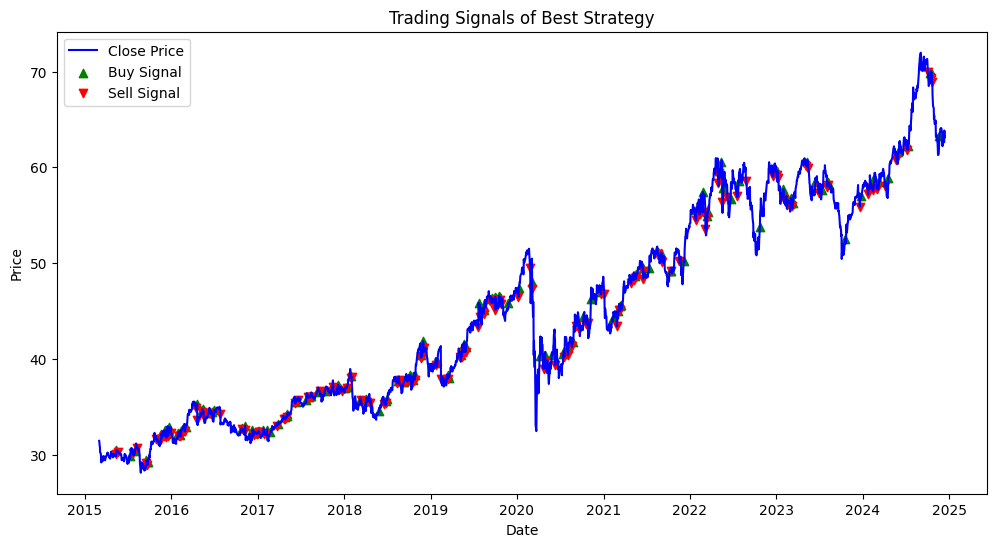

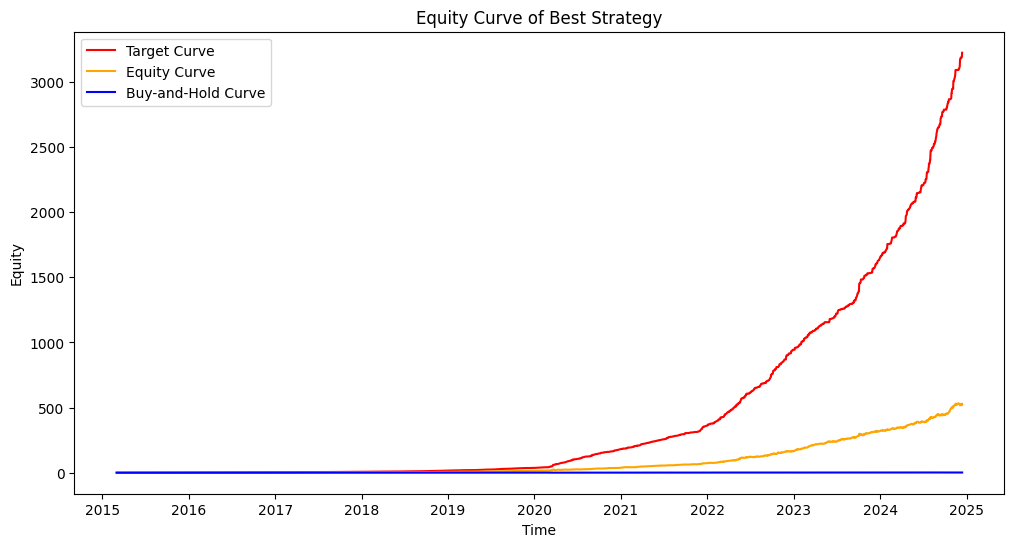

In [ ]:
best_strategy_function = toolbox.compile(expr=improved_ind)

threshold_buy, threshold_sell = 0.01, -0.01

predictions = []
for row in features:
    prediction = best_strategy_function(*row)
    # Ensure prediction is a scalar
    prediction = float(prediction)  # Convert to scalar if necessary
    threshold_buy, threshold_sell = 0.01, -0.01
    if prediction > threshold_buy:
        predictions.append(1)  # Buy
    elif prediction < threshold_sell:
        predictions.append(-1)  # Sell
    else:
        predictions.append(0)  # Hold

data['Prediction'] = pd.Series(predictions, index=data.index)
data['Prediction'].shift(1)
data['Prediction'].fillna(0, inplace=True)  # Fill NaN (introduced by shift) with 0
data['Prediction'] = data['Prediction'].astype(int)  # Convert to integer type
print(data['Prediction'].value_counts())
print("Trades:", data['Prediction'].diff().value_counts())

plot_df = data[['Close']].copy()  # Start with closing prices
plot_df['Signal'] = data[['Prediction']].diff().copy()  # Add the trading signals
# Add any other columns you want to visualize (e.g., indicators)

plt.figure(figsize=(12, 6))
plt.plot(plot_df['Close'], label='Close Price', color='blue')
plt.scatter(plot_df.index[plot_df['Signal'] > 0], plot_df['Close'][plot_df['Signal'] > 0], marker='^', color='green', label='Buy Signal')
#plt.scatter(plot_df.index[plot_df['Signal'] == 0], plot_df['Close'][plot_df['Signal'] == 0], marker='o', color='blue', label='No Signal')
plt.scatter(plot_df.index[plot_df['Signal'] < 0], plot_df['Close'][plot_df['Signal'] < 0], marker='v', color='red', label='Sell Signal')
plt.title('Trading Signals of Best Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

equity_curve = (np.array(data['Prediction'] * data['Close'].pct_change()))
equity_curve[np.isnan(equity_curve)] = 0
data.loc[:, 'Cumulative Return'] = (1 + equity_curve).cumprod()

data['Buy-and-Hold'] = data['Adjusted Close'] / data['Adjusted Close'].iloc[0]

plt.figure(figsize=(12, 6))
plt.plot(data['Target Cumulative Return'], label='Target Curve', color='red')
plt.plot(data['Cumulative Return'], label='Equity Curve', color='orange')
plt.plot(data['Buy-and-Hold'], label='Buy-and-Hold Curve', color='blue')
plt.title('Equity Curve of Best Strategy')
plt.xlabel('Time')
plt.ylabel('Equity')
plt.legend()
plt.show()

# Step 13: Backtest on whole Data

Processing momentum with parameters: {'period': 5}
Processing momentum with parameters: {'period': 10}
Processing momentum with parameters: {'period': 20}
Processing moving_average with parameters: {'period': 10}
Processing moving_average with parameters: {'period': 20}
Processing moving_average with parameters: {'period': 50}
Processing volatility with parameters: {'period': 10}
Processing volatility with parameters: {'period': 20}
Processing volatility with parameters: {'period': 50}
Processing rsi with parameters: {'period': 14}
Processing rsi with parameters: {'period': 20}
Processing rsi with parameters: {'period': 30}
Processing macd with parameters: {'short_period': 10, 'long_period': 26, 'signal_period': 9}
Processing macd with parameters: {'short_period': 10, 'long_period': 26, 'signal_period': 10}
Processing macd with parameters: {'short_period': 10, 'long_period': 30, 'signal_period': 9}
Processing macd with parameters: {'short_period': 10, 'long_period': 30, 'signal_period'

<ipython-input-17-0d687e29a2a2>:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Prediction'].fillna(0, inplace=True)  # Fill NaN (introduced by shift) with 0


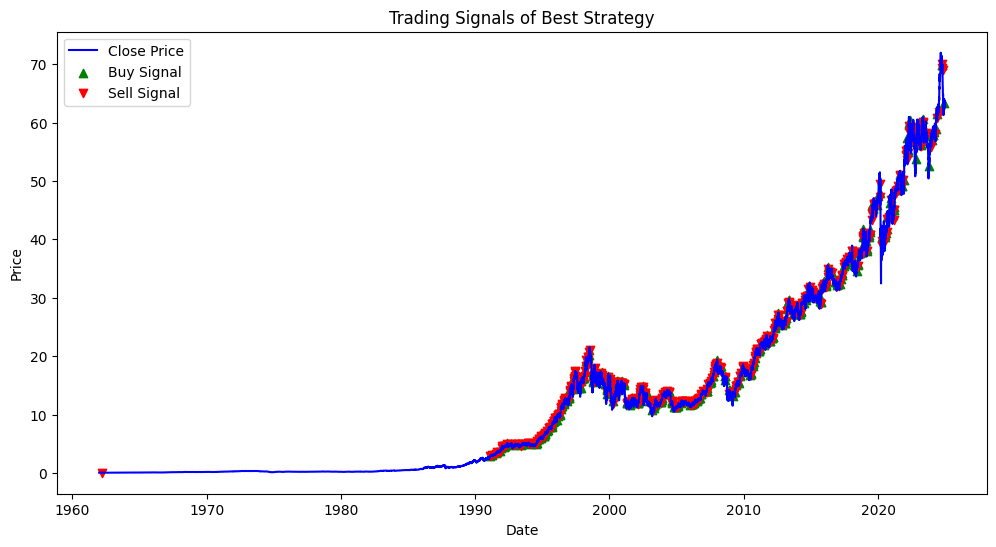

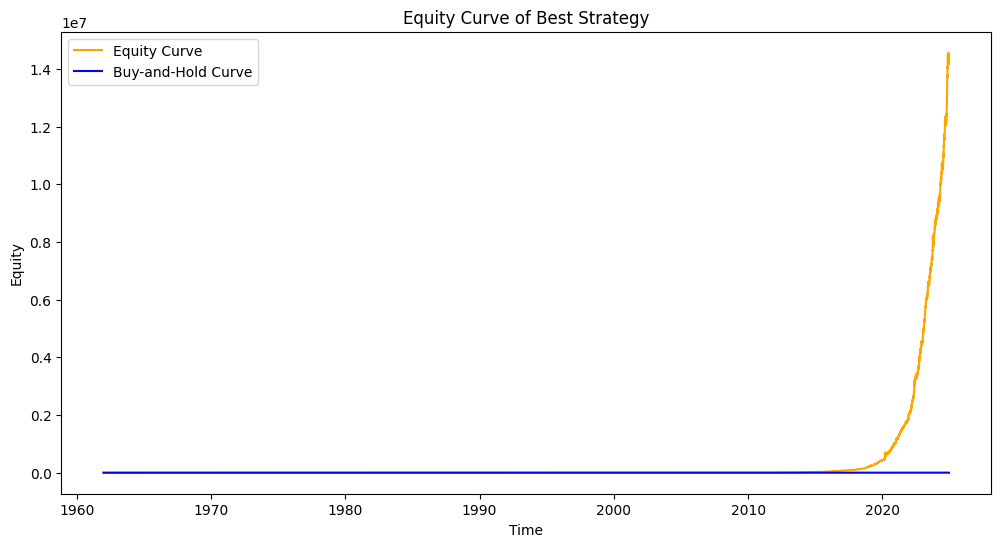

Profit of the strategy: 14382575.29264707
Sharpe of the strategy 9.149274191773424
Max Drawdown of the strategy nan


<ipython-input-13-13db1e499a2f>:56: RuntimeWarning: divide by zero encountered in divide
  drawdown = (peak - equity_curve) / peak
<ipython-input-13-13db1e499a2f>:56: RuntimeWarning: invalid value encountered in divide
  drawdown = (peak - equity_curve) / peak


In [ ]:
ticker = "KO"
test_data = yf.Ticker(ticker).history(period="max")
test_data['Adjusted Close'] = test_data['Close'] + test_data['Dividends'].cumsum()

# Precompute Indicators
precomputed_features = []
feature_name_mapping = {}
for i, indicator in enumerate(feature_set):
    # Generate all parameter combinations
    param_combinations = [dict(zip(feature_set[indicator]['params'], values))
                         for values in itertools.product(*feature_set[indicator]['params'].values())]

    for params in param_combinations:  # Iterate through combinations
        print(f"Processing {indicator} with parameters: {params}")
        feature_data = apply_indicator(indicator, test_data, params)  # Get feature data

        # Handle multiple outputs (e.g., Bollinger Bands, MACD)
        if isinstance(feature_data, tuple):
            # If the indicator returns a tuple (multiple outputs), add each output as a separate feature
            for j, output in enumerate(feature_data):
                precomputed_features.append(output)  # Append each output
                # Create a unique feature name for each output
                new_feature_name = f"{indicator}_{'_'.join(str(v) for v in params.values())}_{j}"
                feature_name_mapping[f"Feature_{len(precomputed_features) - 1}"] = new_feature_name
        else:
            # If the indicator returns a single output, add it as a feature
            precomputed_features.append(feature_data)
            new_feature_name = f"{indicator}_{'_'.join(str(v) for v in params.values())}"
            feature_name_mapping[f"Feature_{len(precomputed_features) - 1}"] = new_feature_name

test_features = np.column_stack(precomputed_features)  # Combine all features

test_predictions = []
for row in test_features:
    test_prediction = best_strategy_function(*row)
    # Ensure prediction is a scalar
    test_prediction = float(test_prediction)  # Convert to scalar if necessary
    threshold_buy, threshold_sell = 0.01, -0.01
    if test_prediction > threshold_buy:
        test_predictions.append(1)  # Buy
    elif test_prediction < threshold_sell:
        test_predictions.append(-1)  # Sell
    else:
        test_predictions.append(0)  # Hold

test_data['Prediction'] = pd.Series(test_predictions, index=test_data.index)
test_data['Prediction'].shift(1)
test_data['Prediction'].fillna(0, inplace=True)  # Fill NaN (introduced by shift) with 0
test_data['Prediction'] = test_data['Prediction'].astype(int)  # Convert to integer type
print(test_data['Prediction'].value_counts())
print("Trades:", test_data['Prediction'].diff().value_counts())

plot_df = test_data[['Close']].copy()  # Start with closing prices
plot_df['Signal'] = test_data[['Prediction']].diff().copy()  # Add the trading signals
# Add any other columns you want to visualize (e.g., indicators)

plt.figure(figsize=(12, 6))
plt.plot(plot_df['Close'], label='Close Price', color='blue')
plt.scatter(plot_df.index[plot_df['Signal'] > 0], plot_df['Close'][plot_df['Signal'] > 0], marker='^', color='green', label='Buy Signal')
#plt.scatter(plot_df.index[plot_df['Signal'] == 0], plot_df['Close'][plot_df['Signal'] == 0], marker='o', color='blue', label='No Signal') # Commented out for better overview
plt.scatter(plot_df.index[plot_df['Signal'] < 0], plot_df['Close'][plot_df['Signal'] < 0], marker='v', color='red', label='Sell Signal')
plt.title('Trading Signals of Best Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

equity_curve = (np.array(test_data['Prediction'] * test_data['Close'].pct_change()))
equity_curve[np.isnan(equity_curve)] = 0
test_data.loc[:, 'Cumulative Return'] = (1 + equity_curve).cumprod()

test_data['Buy-and-Hold'] = test_data['Adjusted Close'] / test_data['Adjusted Close'].iloc[0]

plt.figure(figsize=(12, 6))
plt.plot(test_data['Cumulative Return'], label='Equity Curve', color='orange')
plt.plot(test_data['Buy-and-Hold'], label='Buy-and-Hold Curve', color='blue')
plt.title('Equity Curve of Best Strategy')
plt.xlabel('Time')
plt.ylabel('Equity')
plt.legend()
plt.show()

test_prices = test_data['Close'].values

print("Profit of the strategy:", test_data['Cumulative Return'].iloc[-1])
print("Sharpe of the strategy", calculate_sharpe_ratio(equity_curve, test_prices))
print("Max Drawdown of the strategy", calculate_max_drawdown(equity_curve))

# Step 14: Visualize last Year Prediction Values

<ipython-input-18-40d1f0ca82a8>:1: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_year_data = data.last('1Y')
<ipython-input-18-40d1f0ca82a8>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  last_year_data = data.last('1Y')
<ipython-input-18-40d1f0ca82a8>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_year_data['Prediction'] = pd.Series(last_year_predictions, index=last_year_data.index)
<ipython-input-18-40d1f0ca82a8>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inpl

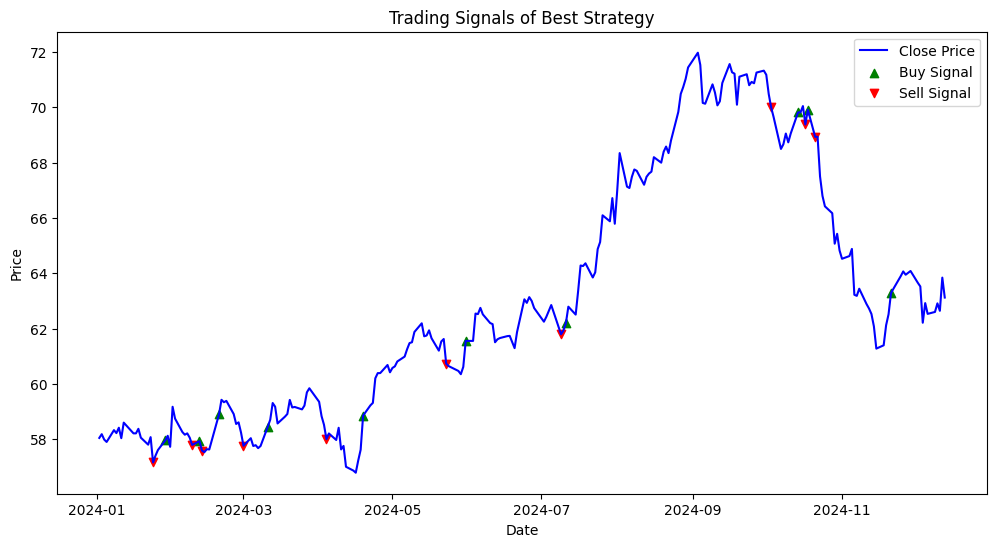

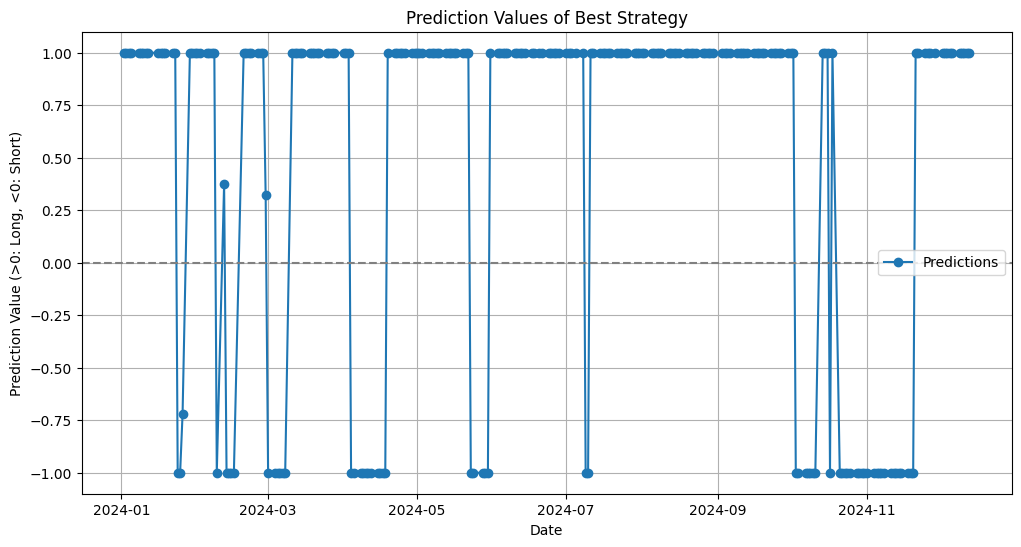

In [ ]:
last_year_data = data.last('1Y')

last_year_indices = last_year_data.index.get_indexer(data.index)  # Original line - commented out
   # Alternatively, using the improved approach to avoid potential issues:
last_year_indices = data.index.get_indexer(last_year_data.index)  # Using the index of the filtered data

valid_indices = [i for i in last_year_indices if i != -1]  # Get valid index values
last_year_features = features[valid_indices]

prediction_values = []
last_year_predictions = []
for row in last_year_features:
    last_year_prediction = best_strategy_function(*row)
    last_year_prediction = float(last_year_prediction)  # Convert to scalar if necessary
    prediction_values.append(last_year_prediction)
    threshold_buy, threshold_sell = 0.01, -0.01
    if last_year_prediction > threshold_buy:
        last_year_predictions.append(1)  # Buy
    elif last_year_prediction < threshold_sell:
        last_year_predictions.append(-1)  # Sell
    else:
        last_year_predictions.append(0)  # Hold

last_year_data['Prediction'] = pd.Series(last_year_predictions, index=last_year_data.index)
last_year_data['Prediction'].shift(1)
last_year_data['Prediction'].fillna(0, inplace=True)  # Fill NaN (introduced by shift) with 0
last_year_data['Prediction'] = last_year_data['Prediction'].astype(int)  # Convert to integer type

plot_df = last_year_data[['Close']].copy()  # Start with closing prices
plot_df['Signal'] = last_year_data[['Prediction']].diff().copy()  # Add the trading signals
# Add any other columns you want to visualize (e.g., indicators)

plt.figure(figsize=(12, 6))
plt.plot(plot_df['Close'], label='Close Price', color='blue')
plt.scatter(plot_df.index[plot_df['Signal'] > 0], plot_df['Close'][plot_df['Signal'] > 0], marker='^', color='green', label='Buy Signal')
#plt.scatter(plot_df.index[plot_df['Signal'] == 0], plot_df['Close'][plot_df['Signal'] == 0], marker='o', color='blue', label='No Signal')
plt.scatter(plot_df.index[plot_df['Signal'] < 0], plot_df['Close'][plot_df['Signal'] < 0], marker='v', color='red', label='Sell Signal')
plt.title('Trading Signals of Best Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(last_year_data.index, np.clip(prediction_values, a_min=-1, a_max=1), label='Predictions', marker='o', linestyle='-')
plt.axhline(y=0, color='gray', linestyle='--')  # Add a horizontal line at y=0 for clarity
plt.title('Prediction Values of Best Strategy')
plt.xlabel('Date')
plt.ylabel('Prediction Value (>0: Long, <0: Short)')
plt.legend()
plt.grid(True)
plt.show()

# Step 15: Compare to NN

            0         1         2          3          4          5         6   \
0          NaN       NaN       NaN        NaN        NaN        NaN       NaN   
1          NaN       NaN       NaN        NaN        NaN        NaN       NaN   
2          NaN       NaN       NaN        NaN        NaN        NaN       NaN   
3          NaN       NaN       NaN        NaN        NaN        NaN       NaN   
4          NaN       NaN       NaN        NaN        NaN        NaN       NaN   
...        ...       ...       ...        ...        ...        ...       ...   
2461 -1.050003 -0.838840 -0.838840  63.341447  62.882494  65.741151  0.709607   
2462 -0.610001 -0.985374  0.026943  63.242910  62.883842  65.572970  0.692347   
2463  0.430000 -1.424103 -0.084263  63.100500  62.879628  65.402366  0.649823   
2464  0.920002 -0.105000  1.314236  63.090000  62.945340  65.269657  0.635349   
2465  0.590000 -0.960003  1.040848  62.993999  62.997383  65.132273  0.533505   

            7         8    

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3269 - loss: -1.4234 - val_accuracy: 0.4046 - val_loss: -1.7939
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3920 - loss: -1.7425 - val_accuracy: 0.3402 - val_loss: -1.8735
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3751 - loss: -1.7682 - val_accuracy: 0.3216 - val_loss: -2.0008
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3448 - loss: -1.7857 - val_accuracy: 0.2158 - val_loss: -2.2292
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2498 - loss: -1.8895 - val_accuracy: 0.1992 - val_loss: -2.1218
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2763 - loss: -1.9054 - val_accuracy: 0.3942 - val_loss: -1.9596
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3382 - loss: -1.8683 - val_accuracy: 0.3921 - val_loss: -2.0474
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3399 - loss: -1.8746 - val_accuracy: 0.3216 - val_l

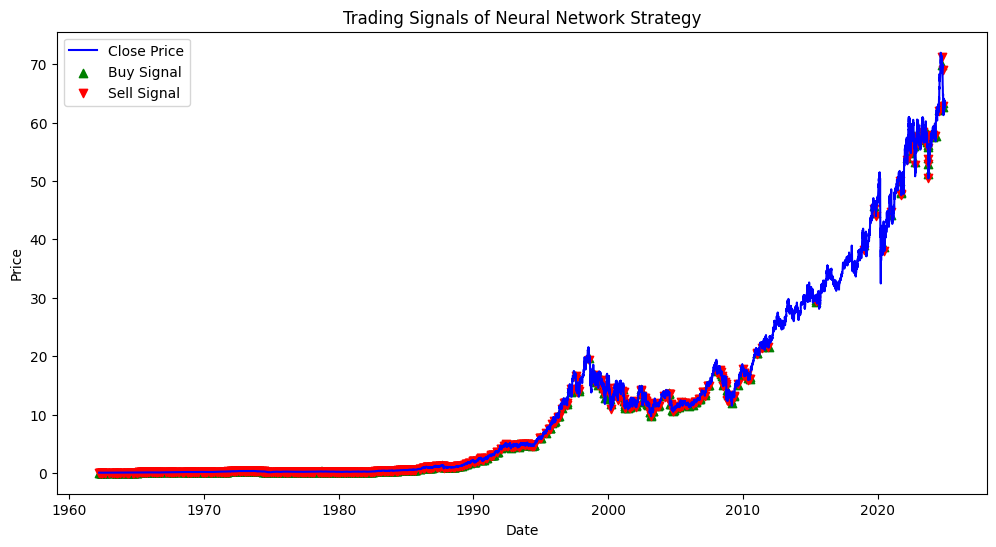

  Model  Accuracy  Sharpe Ratio  Drawdown
0    GP  0.362297      6.320831  0.356934
1    NN  0.477743     -2.478813  0.493827


In [ ]:
from sklearn.model_selection import train_test_split

# Convert 'features' to a Pandas DataFrame
features_df = pd.DataFrame(features)
print(features_df)
# Concatenate 'features_df' and 'data['Target']'
# Drop rows with NaN values (resulting from moving averages)
data.dropna(inplace=True)
features_df = features_df.set_index(data.index)
print(features_df.index)
print(data['Target'].index)
concatenated_df = features_df.reindex(data.index).join(data['Target'])
print(concatenated_df)
# Remove rows with NaN values
cleaned_df = concatenated_df.dropna()
print(cleaned_df)
# Extract features (all columns except the last one, which is the target)
features_extracted = cleaned_df.iloc[:, :-1].values

# Extract target variable (the last column)
target_extracted = cleaned_df.iloc[:, -1].values

X = features_extracted
y = target_extracted
print(len(X), len(y))
# Map target values to 0, 1, 2
y = np.where(y == -1, 0, np.where(y == 0, 1, 2))  # -1: sell, 0: hold, 1: buy
y_series = pd.Series(y) # Convert y to pandas Series
print(y_series.value_counts())
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)  # Apply to both training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y_series, test_size=0.2, random_state=42)  # 80% train, 20% test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 60% train, 20% val, 20% test

import numpy as np

# Check for NaN or infinite values in the features
print("NaN in X_train:", np.isnan(X_train).sum())
print("NaN in X_val:", np.isnan(X_val).sum())
print("NaN in X_test:", np.isnan(X_test).sum())

print("Infinite in X_train:", np.isinf(X_train).any())
print("Infinite in X_val:", np.isinf(X_val).any())
print("Infinite in X_test:", np.isinf(X_test).any())

import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),  # Dropout for regularization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 output classes
])

import tensorflow as tf

def negative_sharpe_loss(y_true, y_pred):
  """
  Calculates the negative Sharpe ratio as a loss function.

  Args:
    y_true: The true target values (daily returns).
    y_pred: The predicted trading signals (1 for buy, -1 for sell, 0 for hold).

  Returns:
    The negative Sharpe ratio.
  """
  strategy_returns = y_pred * y_true  # Element-wise multiplication
  avg_return = tf.reduce_mean(strategy_returns)
  std_dev = tf.math.reduce_std(strategy_returns)
  sharpe_ratio = avg_return / (std_dev + 1e-8)  # Add small epsilon to avoid division by zero
  return -sharpe_ratio  # Return negative for minimization


model.compile(optimizer='adam',
                  loss=negative_sharpe_loss,
                  metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val), callbacks=[callback]  )

from sklearn.metrics import confusion_matrix, classification_report

y_pred = np.argmax(model.predict(X_test), axis=1)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Insert test_features and test_data['Target']

# Parameters for Moving Averages and Threshold
short_window = 30  # Short-term moving average window
long_window = 50   # Long-term moving average window
threshold = 0.001  # 0.1% threshold for significant price change

# Calculate Moving Averages
test_data['Short_MA'] = test_data['Close'].rolling(window=short_window).mean()
test_data['Long_MA'] = test_data['Close'].rolling(window=long_window).mean()

# Identify Trends Using Moving Averages
test_data['Trend'] = np.where(test_data['Short_MA'] > test_data['Long_MA'], 1, -1)  # 1 for uptrend, -1 for downtrend

# Calculate Percentage Price Change
test_data['Price_Change'] = (test_data['Close'].shift(-1) - test_data['Close']) / test_data['Close']

# Define Target Using Trend and Threshold
test_data['Target'] = np.where(
    (test_data['Trend'] == 1) & (test_data['Price_Change'] > threshold), 1,   # Buy signal for uptrend and significant price increase
    np.where(
        (test_data['Trend'] == -1) & (test_data['Price_Change'] < -threshold), -1,  # Sell signal for downtrend and significant price decrease
        0  # Hold for small changes or conflicting signals
    )
)

# Calculate naive strategy metrics
test_data['Target Return'] = data['Target'].shift(1) * data['Daily Return']
test_data['Target Cumulative Return'] = (1 + data['Target Return']).cumprod()

test_features_df = pd.DataFrame(test_features)
test_features_df = test_features_df.set_index(test_data.index)

test_data['Target'] = np.where(test_data['Target'] == -1, 0, np.where(test_data['Target'] == 0, 1, 2))  # -1: sell, 0: hold, 1: buy

concatenated_test_df = test_features_df.reindex(test_data.index).join(test_data[['Close', 'Target']])

cleaned_test_df = concatenated_test_df.dropna()
print(cleaned_test_df)

test_features_extracted = cleaned_test_df.iloc[:, :-2].values

test_target_extracted = cleaned_test_df.iloc[:, -1].values

from sklearn.metrics import accuracy_score

nn_predictions = model.predict(test_features_extracted)
print("NN predictions: ", nn_predictions)
nn_predictions = np.argmax(nn_predictions, axis=1)  # Get predicted class labels
# Convert nn_predictions to a pandas Series before calling value_counts()
nn_predictions_series = pd.Series(nn_predictions)
print("NN Predictions value counts:", nn_predictions_series.value_counts())
# Calculate accuracy using accuracy_score
nn_accuracy = accuracy_score(test_target_extracted, nn_predictions)
print('Test accuracy:', nn_accuracy)
nn_returns = np.array(nn_predictions * cleaned_test_df['Close'].pct_change())
nn_returns[np.isnan(nn_returns)] = 1
print("NN Strategy returns:", nn_returns)
nn_sharpe = calculate_sharpe_ratio(nn_returns, prices)
nn_drawdown = calculate_max_drawdown(nn_returns)

signal_mapping = {
    0: 0,
    1: 1,
    2: -1
}

signals = pd.Series(np.vectorize(signal_mapping.get)(nn_predictions), index=cleaned_test_df.index) # Assign index here

plot_df = pd.DataFrame({'Close': cleaned_test_df['Close'].copy()}) # Create DataFrame with index
plot_df['Signal'] = signals.diff()  # Add the trading signals
print("Plot_df Signals value count:", plot_df['Signal'].value_counts())
plt.figure(figsize=(12, 6))
plt.plot(plot_df['Close'], label='Close Price', color='blue')
plt.scatter(plot_df.index[plot_df['Signal'] > 0], plot_df['Close'][plot_df['Signal'] > 0], marker='^', color='green', label='Buy Signal')
#plt.scatter(plot_df.index[plot_df['Signal'] == 0], plot_df['Close'][plot_df['Signal'] == 0], marker='o', color='blue', label='No Signal')
plt.scatter(plot_df.index[plot_df['Signal'] < 0], plot_df['Close'][plot_df['Signal'] < 0], marker='v', color='red', label='Sell Signal')
plt.title('Trading Signals of Neural Network Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

results = pd.DataFrame({
    'Model': ['GP', 'NN'],
    'Accuracy': [improved_ind.fitness.values[0], nn_accuracy],
    'Sharpe Ratio': [improved_sharpe, nn_sharpe],
    'Drawdown': [improved_ind.fitness.values[2], nn_drawdown],
})
print(results)

# Step 16: Compare to Support Vector Machine

SVM predictions:  [1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1
 1]
SVM

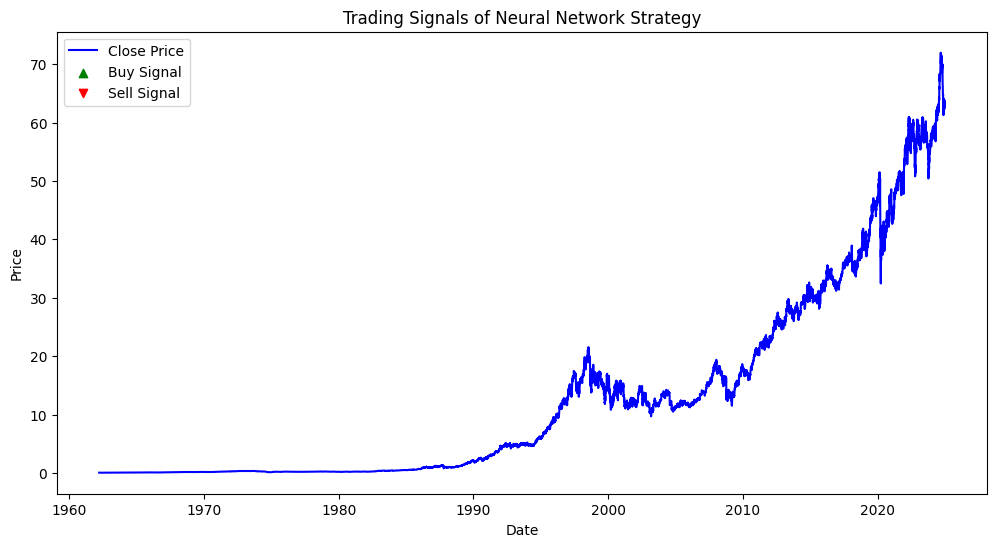

  Model  Accuracy  Sharpe Ratio  Drawdown
0    GP  0.362297      6.320831  0.356934
1   SVM  0.536601      4.034914  0.246914


In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel="rbf")  # Kernel RBF is just used as example

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)
print("SVM predictions: ", y_pred)
print("SVM Predictions value counts:", pd.Series(y_pred).value_counts())

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

svm_predictions = svm_classifier.predict(test_features_extracted)
print("SVM predictions: ", svm_predictions)
print("SVM Predictions value counts:", pd.Series(svm_predictions).value_counts())
svm_accuracy = accuracy_score(test_target_extracted, svm_predictions)
print('Test accuracy:', svm_accuracy)
svm_returns = np.array(svm_predictions * cleaned_test_df['Close'].pct_change())
svm_returns[np.isnan(svm_returns)] = 1
print("SVM Strategy returns:", svm_returns)
svm_sharpe = calculate_sharpe_ratio(svm_returns, prices)
svm_drawdown = calculate_max_drawdown(svm_returns)

signal_mapping = {
    0: 0,
    1: 1,
    2: -1
}

signals = pd.Series(np.vectorize(signal_mapping.get)(svm_predictions), index=cleaned_test_df.index) # Assign index here

plot_df = pd.DataFrame({'Close': cleaned_test_df['Close'].copy()}) # Create DataFrame with index
plot_df['Signal'] = signals.diff()  # Add the trading signals
print("Plot_df Signals value count:", plot_df['Signal'].value_counts())
plt.figure(figsize=(12, 6))
plt.plot(plot_df['Close'], label='Close Price', color='blue')
plt.scatter(plot_df.index[plot_df['Signal'] > 0], plot_df['Close'][plot_df['Signal'] > 0], marker='^', color='green', label='Buy Signal')
#plt.scatter(plot_df.index[plot_df['Signal'] == 0], plot_df['Close'][plot_df['Signal'] == 0], marker='o', color='blue', label='No Signal')
plt.scatter(plot_df.index[plot_df['Signal'] < 0], plot_df['Close'][plot_df['Signal'] < 0], marker='v', color='red', label='Sell Signal')
plt.title('Trading Signals of Neural Network Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

results = pd.DataFrame({
    'Model': ['GP', 'SVM'],
    'Accuracy': [improved_ind.fitness.values[0], svm_accuracy],
    'Sharpe Ratio': [improved_sharpe, svm_sharpe],
    'Drawdown': [improved_ind.fitness.values[2], svm_drawdown],
})
print(results)

# Step 17: Compare to Random Forest

RF predictions:  [1 1 2 1 0 1 2 1 1 2 1 1 1 0 2 1 1 1 1 1 1 2 1 1 0 1 2 0 1 1 2 1 0 1 2 0 1
 1 2 1 2 1 1 1 1 1 1 2 0 1 1 1 2 1 2 1 1 1 2 1 0 1 1 0 0 1 2 1 1 1 1 2 1 1
 1 1 1 1 2 1 1 1 2 1 1 1 2 0 1 2 1 2 1 1 1 2 2 1 0 1 1 2 2 1 1 1 1 1 1 2 2
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1 2 1 0 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1
 2 1 1 1 2 1 1 2 1 0 1 2 1 2 1 1 2 1 0 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 2 2 2
 1 1 2 2 2 2 1 1 1 1 0 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 0 1 1 1 0 1 2 1 2 1 1
 2 1 1 2 1 2 1 2 2 0 2 0 1 2 1 2 1 2 1 1 2 2 0 2 2 2 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 2 0 2 2 1 1 2 1 2 0 1 1 1 1 2 1 1 0 2 1 1 1 1 1 1 2 2 1 1 2 1 1 1 1
 2 1 1 2 2 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 2 1 2 1 1 0 2 1 1 2 2 1 1 1 1 1
 1 2 1 0 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 0 0 2 2 1 1 1 1 2 1 1 1 1
 2 1 1 1 1 0 2 1 1 2 2 2 1 2 1 1 2 1 1 2 2 2 1 1 1 1 1 2 1 1 1 1 2 1 0 2 2
 1 1 2 1 2 2 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 0 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 2 1 1 1 1 1 2 1 2 1 1 2 1 2 1 2 2 1 0
 1]
RF P

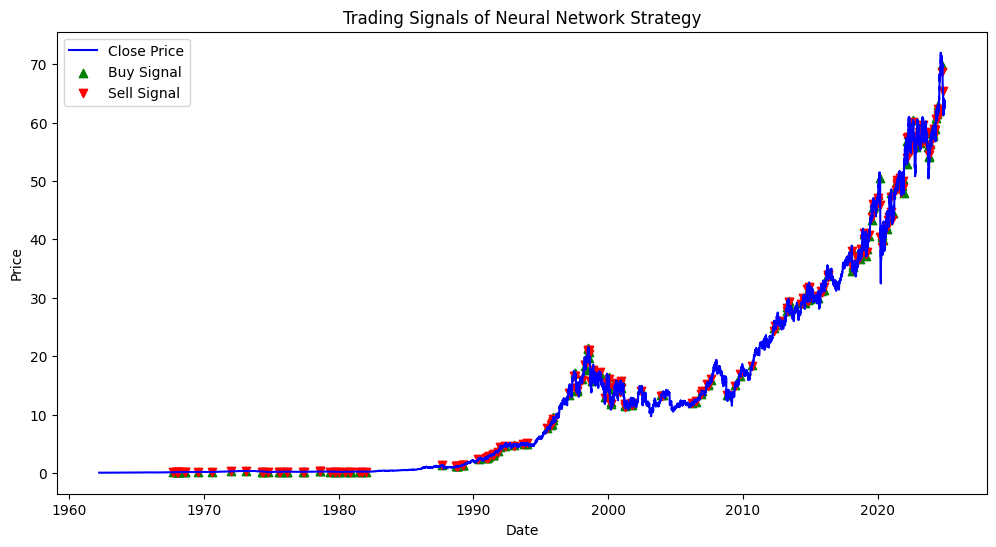

  Model  Accuracy  Sharpe Ratio  Drawdown
0    GP  0.362297      6.320831  0.356934
1    RF  0.531777      3.501442  0.246914


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # Adjust hyperparameters like n_estimators as needed

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
print("RF predictions: ", y_pred)
print("RF Predictions value counts:", pd.Series(y_pred).value_counts())

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

rf_predictions = rf_classifier.predict(test_features_extracted)
print("RF predictions: ", rf_predictions)
print("RF Predictions value counts:", pd.Series(rf_predictions).value_counts())
rf_accuracy = accuracy_score(test_target_extracted, rf_predictions)
print('Test accuracy:', rf_accuracy)
rf_returns = np.array(rf_predictions * cleaned_test_df['Close'].pct_change())
rf_returns[np.isnan(rf_returns)] = 1
print("RF Strategy returns:", rf_returns)
rf_sharpe = calculate_sharpe_ratio(rf_returns, prices)
rf_drawdown = calculate_max_drawdown(rf_returns)

signal_mapping = {
    0: 0,
    1: 1,
    2: -1
}

signals = pd.Series(np.vectorize(signal_mapping.get)(rf_predictions), index=cleaned_test_df.index) # Assign index here

plot_df = pd.DataFrame({'Close': cleaned_test_df['Close'].copy()}) # Create DataFrame with index
plot_df['Signal'] = signals.diff()  # Add the trading signals
print("Plot_df Signals value count:", plot_df['Signal'].value_counts())
plt.figure(figsize=(12, 6))
plt.plot(plot_df['Close'], label='Close Price', color='blue')
plt.scatter(plot_df.index[plot_df['Signal'] > 0], plot_df['Close'][plot_df['Signal'] > 0], marker='^', color='green', label='Buy Signal')
#plt.scatter(plot_df.index[plot_df['Signal'] == 0], plot_df['Close'][plot_df['Signal'] == 0], marker='o', color='blue', label='No Signal')
plt.scatter(plot_df.index[plot_df['Signal'] < 0], plot_df['Close'][plot_df['Signal'] < 0], marker='v', color='red', label='Sell Signal')
plt.title('Trading Signals of Neural Network Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

results = pd.DataFrame({
    'Model': ['GP', 'RF'],
    'Accuracy': [improved_ind.fitness.values[0], rf_accuracy],
    'Sharpe Ratio': [improved_sharpe, rf_sharpe],
    'Drawdown': [improved_ind.fitness.values[2], rf_drawdown],
})
print(results)

# Step 18: Compare all together

NN Strategy returns: 14402
SVM Strategy returns: 14782
RF Strategy returns: 14512
GP Strategy returns: 15849
NN Strategy Cumulative Return: 0.00029069334159065617
SVM Strategy Cumulative Return: 2823.1046723733325
RF Strategy Cumulative Return: 950.4818574345442
GP Strategy Cumulative Return: 14382575.29264707


<ipython-input-23-72e3f9578df1>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("GP Strategy Cumulative Return:", test_data['Cumulative Return'][-1])


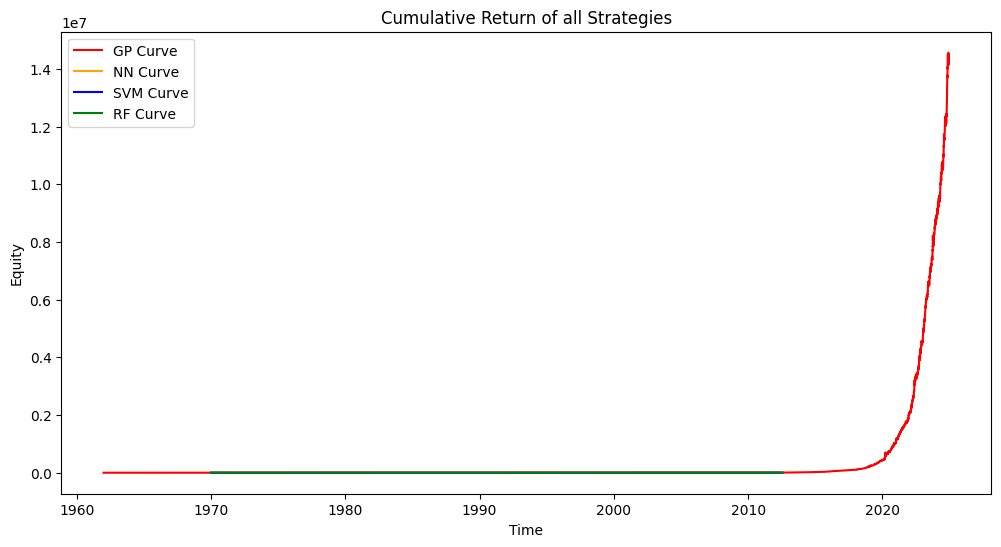

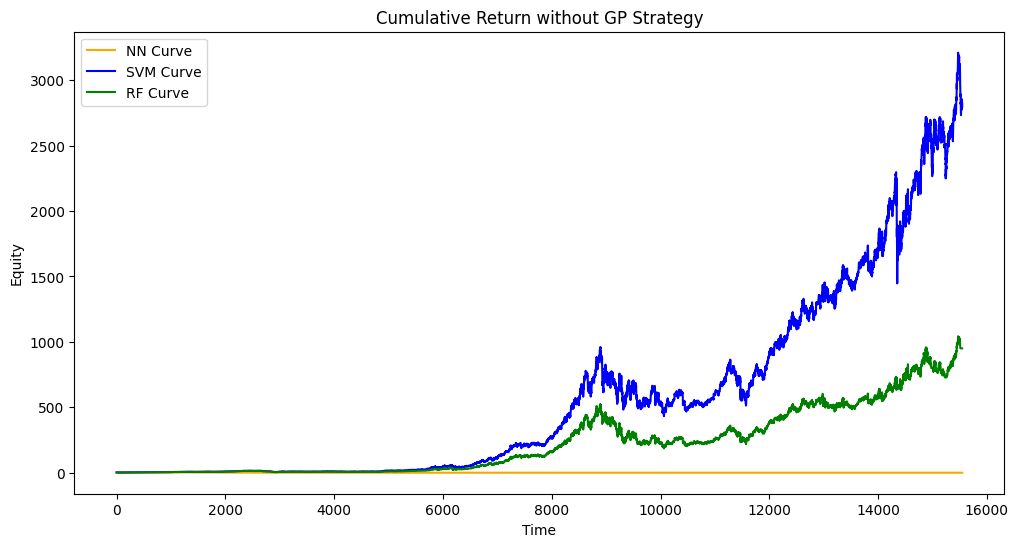

In [ ]:
print("NN Strategy returns:", np.count_nonzero(nn_returns))
print("SVM Strategy returns:", np.count_nonzero(svm_returns))
print("RF Strategy returns:", np.count_nonzero(rf_returns))
print("GP Strategy returns:", np.count_nonzero(test_data['Cumulative Return']))
print("NN Strategy Cumulative Return:", (1 + nn_returns).cumprod()[-1])
print("SVM Strategy Cumulative Return:", (1 + svm_returns).cumprod()[-1])
print("RF Strategy Cumulative Return:", (1 + rf_returns).cumprod()[-1])
print("GP Strategy Cumulative Return:", test_data['Cumulative Return'][-1])

plt.figure(figsize=(12, 6))
plt.plot(test_data['Cumulative Return'], label='GP Curve', color='red')
plt.plot((1 + nn_returns).cumprod(), label='NN Curve', color='orange')
plt.plot((1 + svm_returns).cumprod(), label='SVM Curve', color='blue')
plt.plot((1 + rf_returns).cumprod(), label='RF Curve', color='green')
plt.title('Cumulative Return of all Strategies')
plt.xlabel('Time')
plt.ylabel('Equity')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot((1 + nn_returns).cumprod(), label='NN Curve', color='orange')
plt.plot((1 + svm_returns).cumprod(), label='SVM Curve', color='blue')
plt.plot((1 + rf_returns).cumprod(), label='RF Curve', color='green')
plt.title('Cumulative Return without GP Strategy')
plt.xlabel('Time')
plt.ylabel('Equity')
plt.legend()
plt.show()